# Kannusteet, työllistymis- ja efektiivinen veroaste
Antti Tanskanen,
1.2.2022

Efektiivinen veroaste kertoo, paljonko ansaituista lisäansioista menee verojen kasvamiseen ja etuuksien pienenemisen. Työllistymisveroaste taas kertoo, mikä osuus siirtyminen työttömyydestä työhön tuomista palkkatuloista menee veroihin ja etuuksien pienenemiseen. Tulokset ovat erilaisille perheille erilaisia, erityisesti johtuen erilaisista etuuksista. Työllistymisveroaste määritellään

$$
V=1-\frac{T_2-T_1}{\Delta t},
$$

missä $T_1$ on nettotulot työttömänä sisältäen etuudet, $T_2$ on nettotulot työllistyneenä, $\Delta t$ on työstä saatava palkka. Efektiivinen marginaalivero lasketaan samalla kaavalla.

Jos esimerkiksi työttömänä käteen jää 100 e/kk, ja työllistyneenä 500 euron kuukausipalkasta jää 300 e/kk käteen verojen ja etuuksien pienentymisen jälkeen, on työllistymisveroaste 60 prosentti.

Efektiivinen marginaalivero kertoo, paljonko lisätulosta menee veroihin yms. Jos tulotaso nyt on 1500 e/kk ja siitä jää käteen etuudet mukaanlukien 1400 e/kk. Jos lisätyöllä bruttotulon saa nostettua 2000 euroon kuukaudessa, josta jää 1600 e/kk käteen (etuudet mukana), on efektiivinen veroaste 60 prosenttia.

Tarkempaa tietoa veroasteiden laskennasta löytyy esimerkiksi julkaisuista Kärkkäinen ja Tervola [2018] ja Viitamäki [2015].

## Python-kirjasto

Tässä työkirjassa esitellään Python-kirjasto fin_benefit, jonka avulla on helppo tarkastella käteen jäävien tulojen osuutta, efektiivistä marginaaliveroa ja työllistymisveroastetta. Kirjasto on melko suppea, noin 2 000 riviä koodia yhteensä.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt

include_alv=True

plt.rcParams['figure.figsize'] = [10, 5]

/Users/anttitanskanen/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


## Tyyppitapauksia ja niiden korvausasteita

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [3]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=10,tulosta=True)

1 aikuinen ja 1 lapsi. Työtön (ansiopvraha, peruste 1500 e/kk), ei puolisoa


In [4]:
print(p)

{'tyoton': 1, 'ika': 30, 'saa_ansiopaivarahaa': 1, 't': 0, 'vakiintunutpalkka': 1500, 'perustulo': 0, 'asumismenot_toimeentulo': 660, 'asumismenot_asumistuki': 600, 'lapsia': 1, 'lapsia_paivahoidossa': 1, 'aikuisia': 1, 'veromalli': 0, 'kuntaryhma': 2, 'lapsia_kotihoidontuella': 0, 'alle3v': 0, 'ansiopvrahan_suojaosa': 1, 'ansiopvraha_lapsikorotus': 1, 'puoliso_tulot': 0, 'puoliso_tyoton': 0, 'puoliso_vakiintunutpalkka': 0, 'puoliso_saa_ansiopaivarahaa': 0, 'puoliso_tyottomyyden_kesto': 100, 'tyottomyyden_kesto': 10, 'saa_elatustukea': 1, 'elakkeella': 0, 'tyoelake': 0, 'opiskelija': 0, 'aitiysvapaalla': 0, 'isyysvapaalla': 0, 'kotihoidontuella': 0, 'puoliso_t': 0, 'asumismenot_yhdistetty': 660, 'lapsia_alle_3v': 0, 'lapsia_alle_kouluikaisia': 1, 'puoliso_elakkeella': 0, 'puoliso_opiskelija': 0, 'puoliso_tyoelake': 0, 'puoliso_aitiysvapaalla': 0, 'puoliso_isyysvapaalla': 0, 'puoliso_sairauspaivarahalla': 0, 'puoliso_kotihoidontuella': 0}


In [5]:
fin_benefits.print_examples()

Tapaus 1:
1 aikuinen, ei lapsia. Töissä, ei puolisoa

Tapaus 2:
1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 3:
1 aikuinen, ei lapsia. Työtön (työmarkkinatuki), ei puolisoa

Tapaus 4:
1 aikuinen ja 1 lapsi. Töissä, ei puolisoa

Tapaus 5:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

Tapaus 6:
2 aikuista ja 2 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 7:
2 aikuista ja 1 lapsi. Työtön (ansiopvraha, peruste 2500 e/kk), puoliso työtön (työmarkkinatuki)

Tapaus 8:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

Tapaus 9:
2 aikuista ja 3 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 10:
1 aikuinen ja 1 lapsi. Työtön (ansiopvraha, peruste 1500 e/kk), ei puolisoa

Tapaus 11:
1 aikuinen ja 3 lasta. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 12:
2 aikuista ja 2 lasta. Työtön (työmarkkinatuki), puoliso töissä (1250 e/kk).

Tapaus 13:
2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), puoli

Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kolmesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

In [6]:
# tarkasteluvuosi
year=2022

# Luokka Benefits sisältää etuuskoodin
ben=fin_benefits.Benefits(year=year)

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg=fin_benefits.Marginals(ben,year=year,incl_alv=include_alv)

Ja sitten lasketaan käteen jäävä tulo, efektiivinen marginaalivero, työllistymisveroaste ja osatyöstä kokoaikatyöhön siirtymän efektiivinen marginaalivero. Laskelmat tehdään 1 e/kk askelvälillä. Efektiivinen marginaalivero lasketaan 100 e/kk lisätulolla. Osatyöstä kokoaikatyöhön siirryttäessä palkka kaksinkertaistuu.

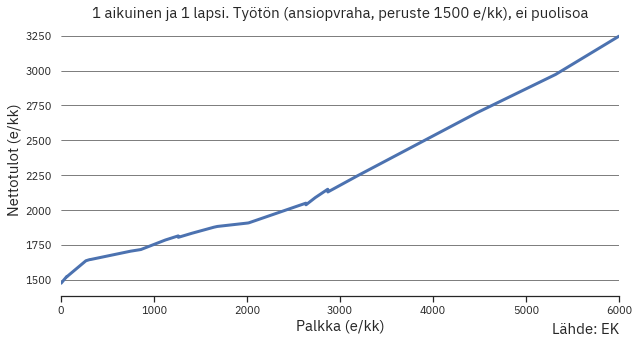

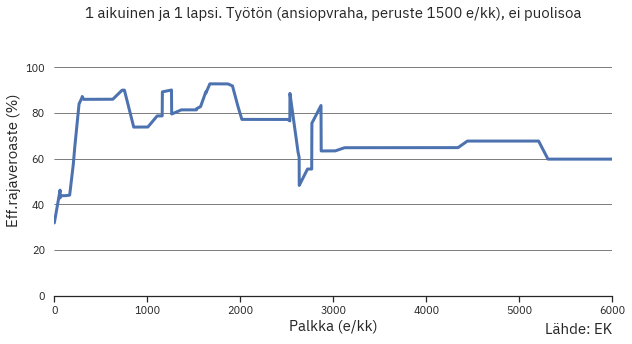

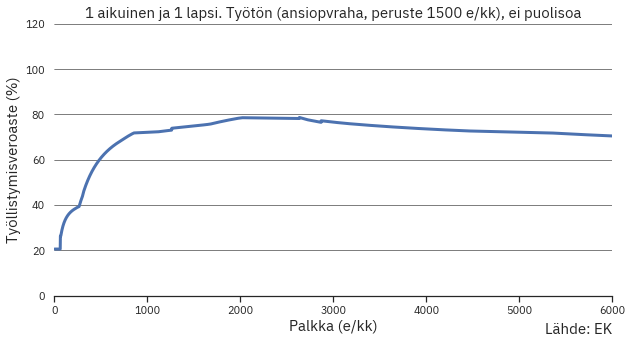

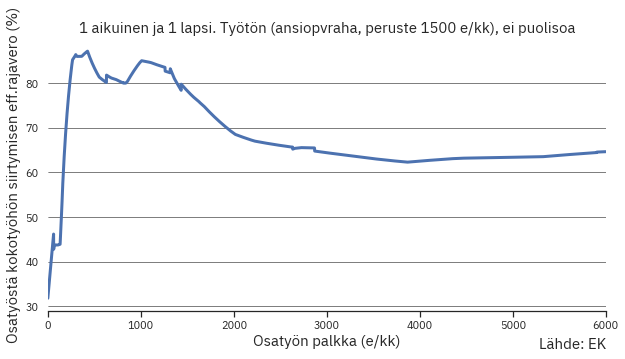

In [7]:

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa(p,incl_alv=include_alv)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

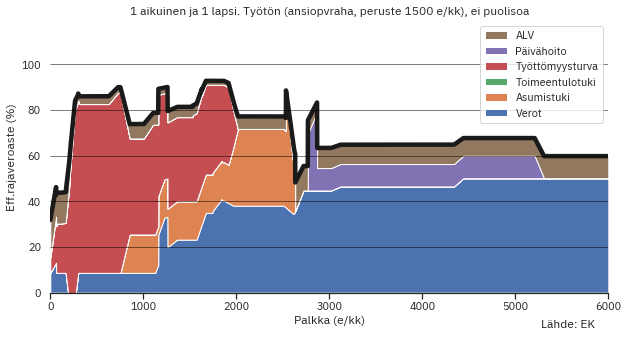

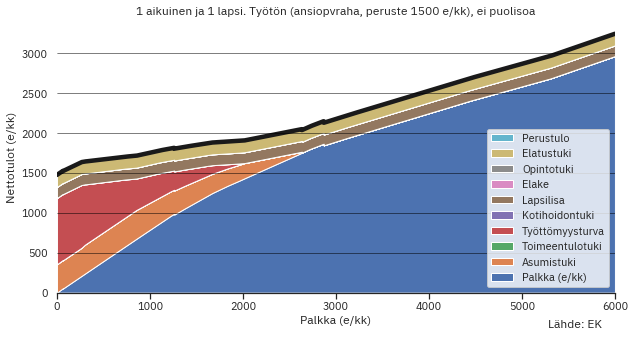

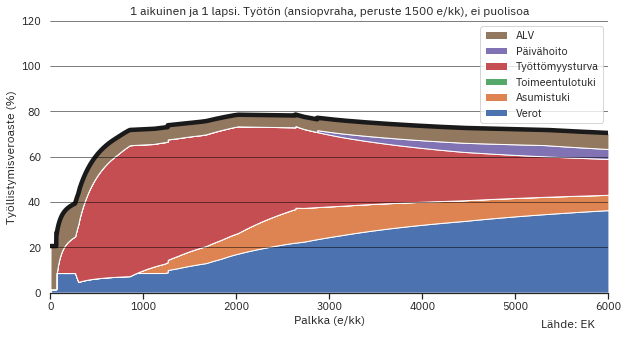

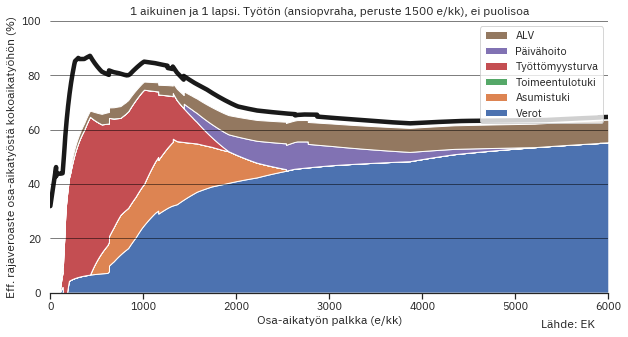

[ 0.          0.          0.         ... 63.62592651 63.62701261
 63.62809835] [100.         100.         100.         ...  65.29314892  65.2939571
  65.29476502] [31.82694242 32.05863725 32.29033207 ... 64.62223622 64.62315624
 64.62407595]


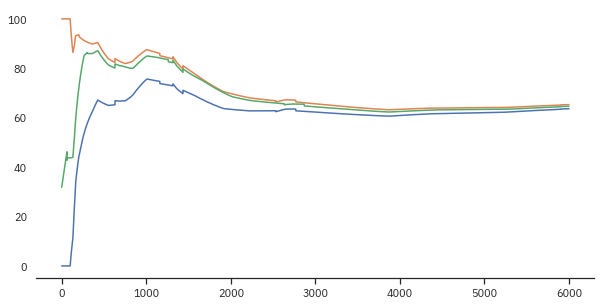

In [8]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p,plot_tva=True,figname='huoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=include_alv,
                                 incl_opintotuki=False)

# siirtymä työttömästä töihin

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2000 e/kk), ei puolisoa
1 aikuinen, ei lapsia. Töissä, ei puolisoa


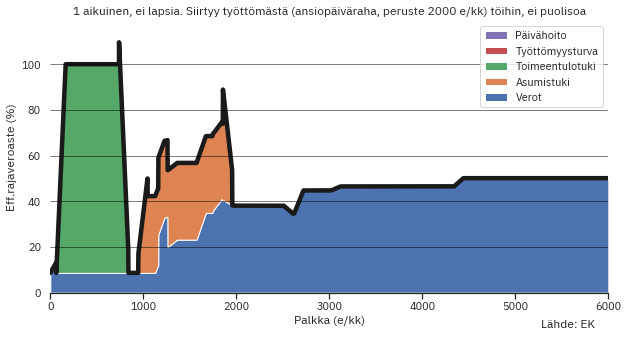

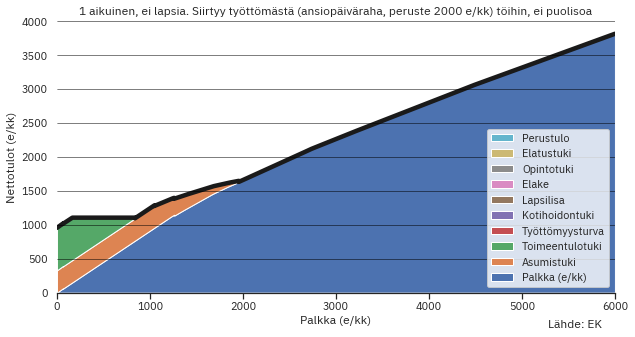

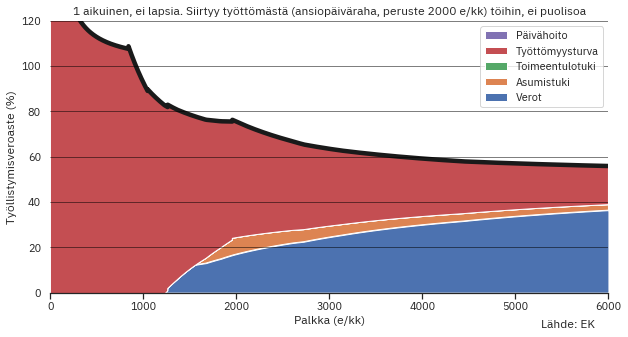

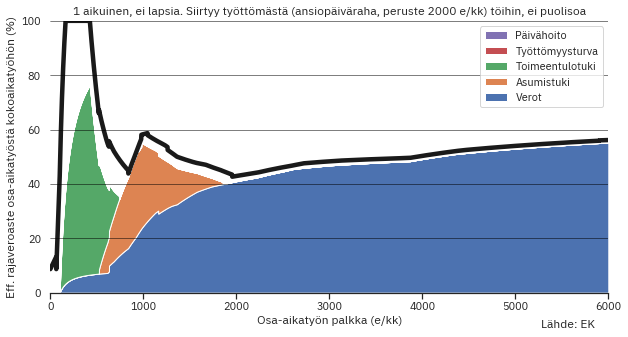

[ 0.          0.          0.         ... 55.29628225 55.29756232
 55.29884195] [100.         100.         100.         ...  56.96350466  56.96450681
  56.96550862] [ 8.65        8.7215      8.793      ... 56.13157291 56.13271373
 56.13385418]


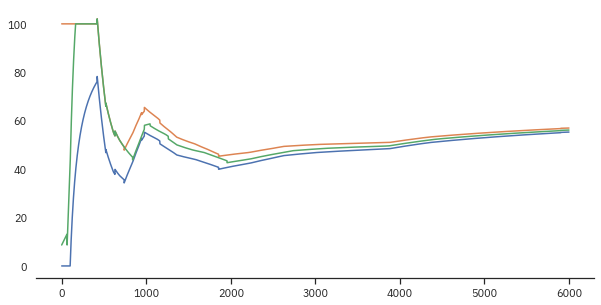

In [9]:
p1,selite1=fin_benefits.perheparametrit(perhetyyppi=50,tulosta=True)
p2,selite2=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)

# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p1,p2,plot_tva=True,figname='huoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,
                                 incl_opintotuki=False)

# Etuuslajien muokkaus
Etuuslajien muokkaaminen on helppoa: kopioidaan luokka Benefits ja korvataan haluttu etuusmuoto uudella.

Esimerkin vuoksi korvataan toimeentulotuki yhteensovittamattomalla 750 e/kk tuella. Tämä on eräänlainen perustulo, mutta se ei ole kustannusneutraali ilman muutoksia verotukseen

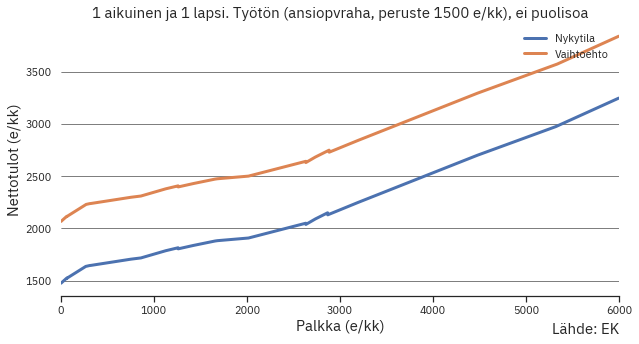

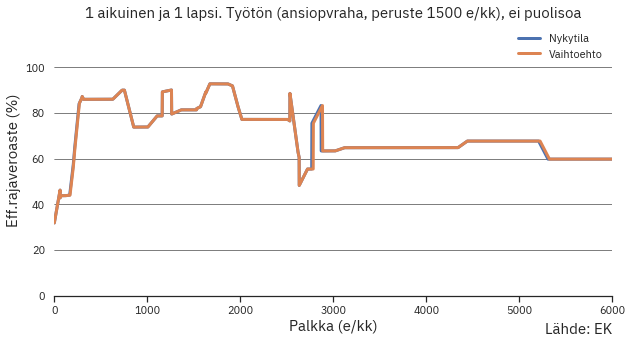

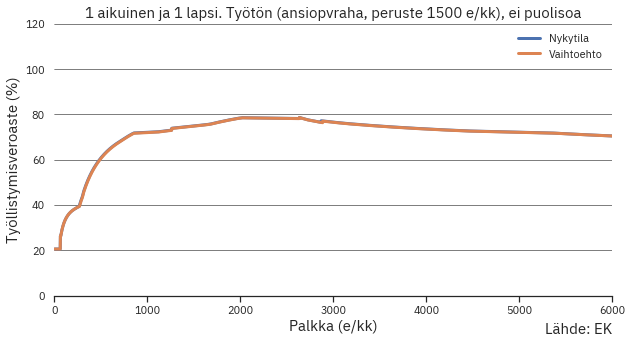

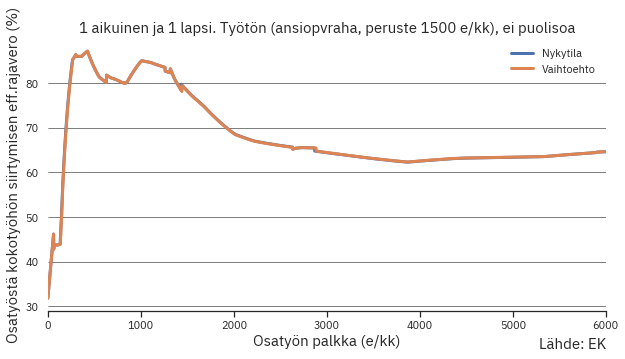

In [10]:
## uusi toimeentulotuki

# Ensin kloonataan Luokka Benefits() sisältää koodin
class Suurempituki(fin_benefits.Benefits):
    def toimeentulotuki(self,omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p):
        return 750

# Luokka Suurempituki() sisältää koodin
perustulo=Suurempituki()

# ja tätä vastaava plottausluokka
margp=fin_benefits.Marginals(perustulo,year=year)

# ja lasketaan & plotataan tulokset
_,_,_,_=margp.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva,baseosatva=baseosatva,incl_alv=include_alv)

Perustuloon liittyy myös kasvavan etuusmenon rahoitus. Tämä toteutetaan nostamalla veroja. 

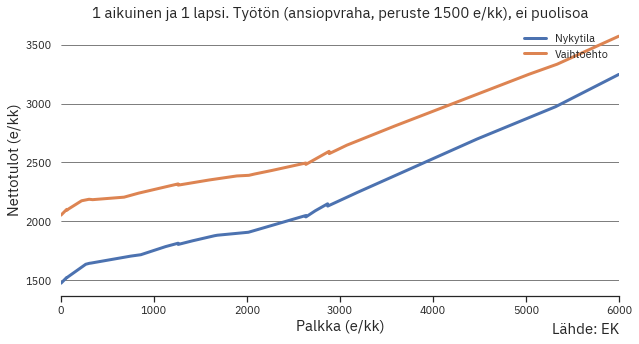

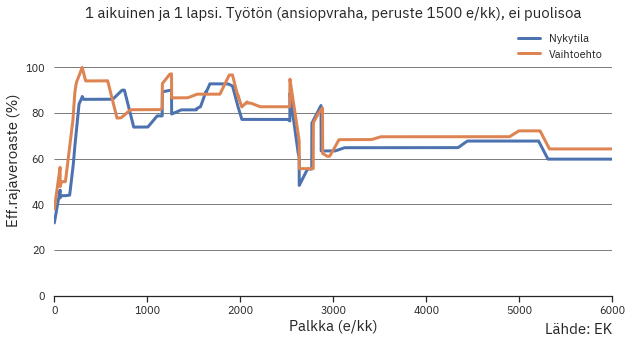

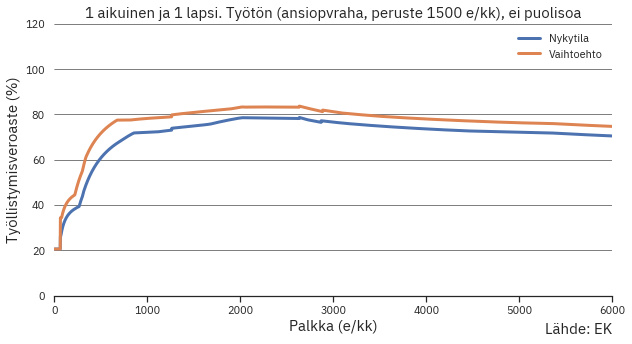

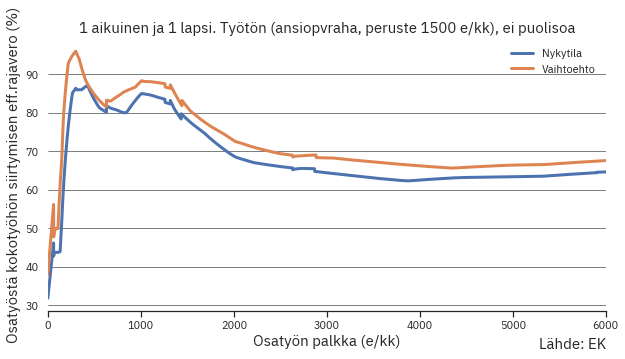

In [11]:
## Lisätään mukaan verotus

# Luokka Suurempituki() sisältää koodin
perustulo_ml_verotus=Suurempituki(additional_tyel_premium=0.10)

# ja tätä vastaava plottausluokka
margp2=fin_benefits.Marginals(perustulo_ml_verotus,year=year)

# ja lasketaan & plotataan tulokset
_,_,_,_=margp2.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva,baseosatva=baseosatva,incl_alv=True)

# Esimerkki tuen muuttamisesta


## Muokataan asumistukea
Entä jos asumistuessa suojaosa olisi perhekohtainen ja palkkatuloa kohdeltaisiin lievemmin kuin muuta tuloa?

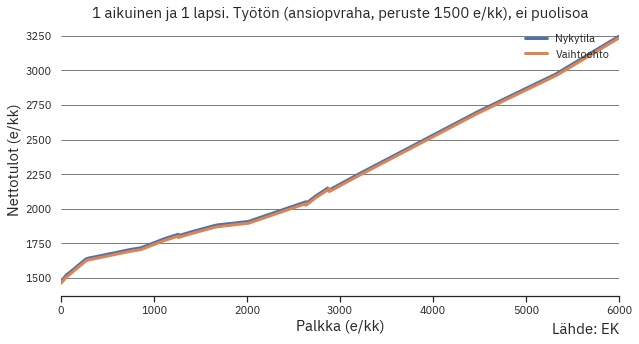

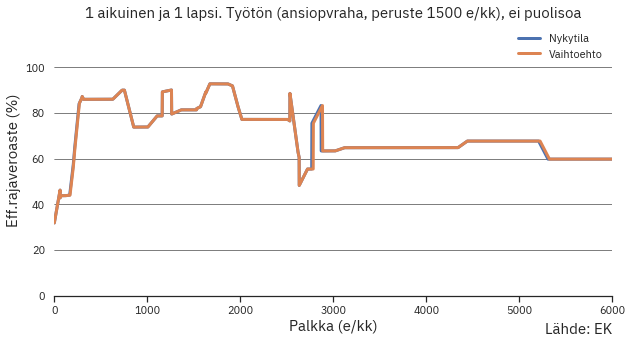

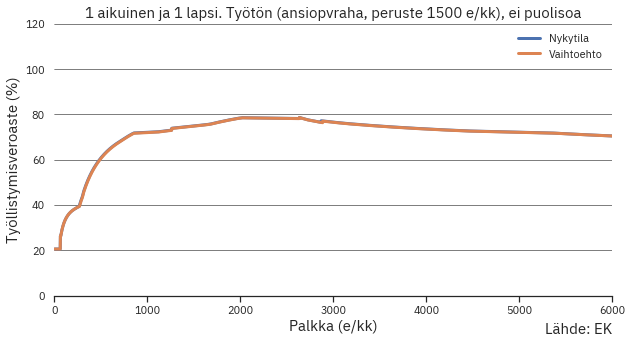

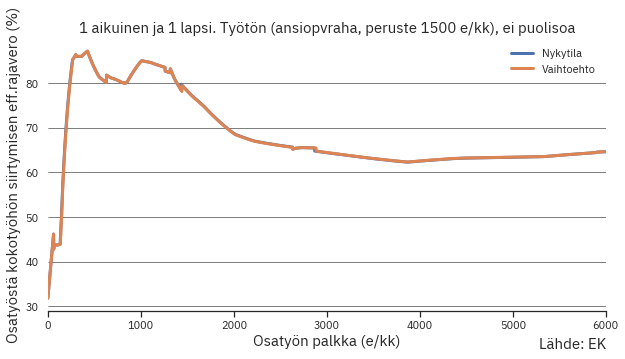

In [12]:
## uusi asumistuki

# Ensin kloonataan luokka Benefits(), joka sisältää koodin
class Parempituki(fin_benefits.Benefits):
    def asumistuki(self,palkkatulot,muuttulot,vuokra,p):
        max_menot=np.array([[537, 520, 413, 364],[778, 746, 602, 530],[990, 941, 764, 678],[1157, 1097, 906, 808]])
        max_lisa=np.array([144, 137, 124, 119])
        max_meno=max_menot[min(3,p['aikuisia']+p['lapsia']-1),p['kuntaryhma']]+max(0,p['aikuisia']+p['lapsia']-4)*max_lisa[p['kuntaryhma']]

        prosentti=0.70
        suojaosa=300 # per talous, ei per aikuiset
        perusomavastuu=max(0,0.47*(0.8*max(0,palkkatulot-suojaosa)+0.9*muuttulot-(542+90*p['aikuisia']+200*p['lapsia'])))
        tuki=max(0,(min(max_meno,vuokra)-perusomavastuu)*prosentti);

        return tuki
    
    def toimeentulotuki(self,omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p,omavastuuprosentti=0.0):
    
        # kutsutaan alkuperäistä 7%:n omavastuuprosenttikertoimella
        return super().toimeentulotuki(omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p,omavastuuprosentti=0.07)

# Luokka Parempituki() sisältää koodin
tuki=Parempituki()

# ja tätä vastaava plottausluokka
tukiplot=fin_benefits.Marginals(tuki,year=year)

# ja lasketaan & plotataan tulokset
_,_,_,_=tukiplot.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva,baseosatva=baseosatva,incl_alv=True)

# Määritellään uusi esimerkkitapaus

Ennaltamääriteltyjen tyyppitapausten lisäksi on helppo määritellä uusia. 

In [13]:
p={'tyoton': 1, 'ika': 30, 'saa_ansiopaivarahaa': 1, 'piikit_pois': 0, 't': 0, 'vakiintunutpalkka': 1500, 
   'elakkeella': 0, 'asumismenot_toimeentulo': 1150, 'asumismenot_asumistuki': 1024, 'lapsia': 2, 
   'lapsia_paivahoidossa': 2, 'aikuisia': 2, 'veromalli': 0, 'kuntaryhma': 2, 'lapsia_kotihoidontuella': 0, 
   'alle3v': 0, 'ansiopvrahan_suojaosa': 1, 'ansiopvraha_lapsikorotus': 1, 'puoliso_t': 2500, 
   'puoliso_tyoton': 0, 'puoliso_vakiintunutpalkka': 0, 'puoliso_saa_ansiopaivarahaa': 0, 
   'puolison_vakiintunutpalkka': 2500, 'asumismenot_yhdistetty': 1150, 'puolison_tyottomyyden_kesto':10, 
   'tyottomyyden_kesto': 10, 'aitiysvapaalla': 0, 'isyysvapaalla': 0, 'kotihoidontuella': 0,
   'puoliso_elakkeella': 0, 'puoliso_opiskelija': 0,'puoliso_tyoelake': 0, 'puoliso_aitiysvapaalla': 0,
   'puoliso_isyysvapaalla': 0,'puoliso_sairauspaivarahalla': 0, 'puoliso_kotihoidontuella': 0}
print(fin_benefits.tee_selite(p))

2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), puoliso töissä (2500 e/kk).


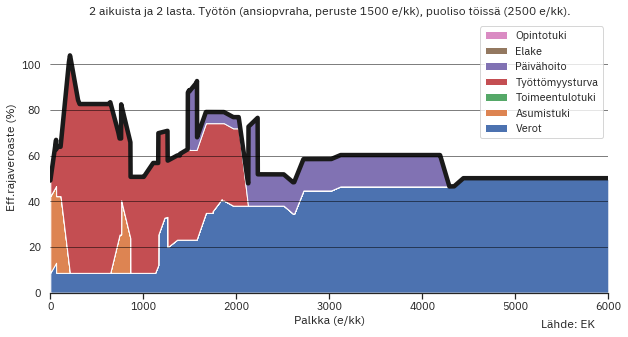

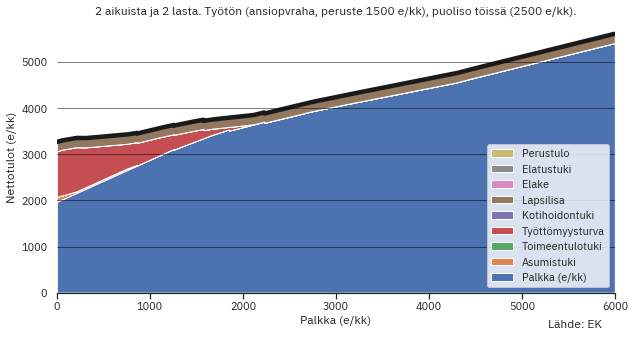

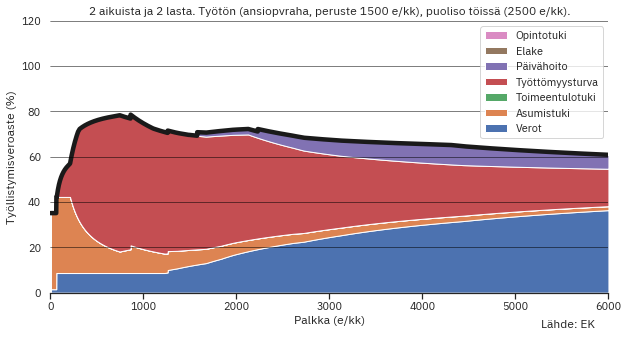

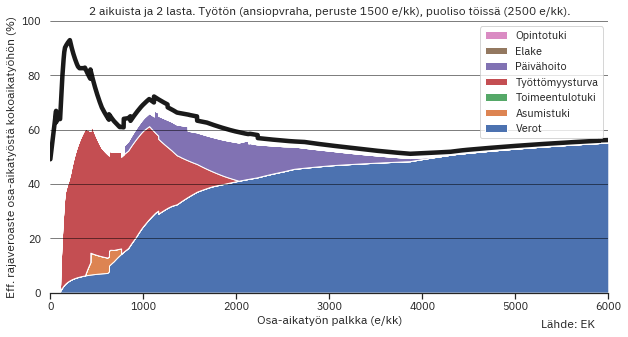

[ 0.          0.          0.         ... 55.29628225 55.29756232
 55.29884195] [100.         100.         100.         ...  56.96350466  56.96450681
  56.96550862] [49.0654086  49.35271019 49.64001177 ... 56.13157291 56.13271373
 56.13385418]


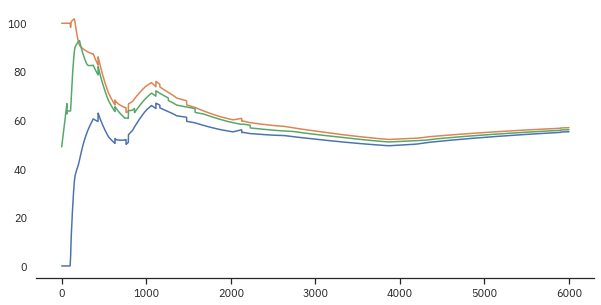

In [14]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p)

# Piikit efektiivisessä marginaaliverossa

Riippuen siitä, millaisia lisätuloja oletetaan, muuttuvat tulokset. Peruslaskelmassa dt=100 e/kk, joten vrrataan sitä dt=1 e/kk:hon.

2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), puoliso töissä (2500 e/kk).
-45589.75476653222 : 3258.9331629374997 2802.0356152721774
-22777.32738326613 : 3259.5821629375 2802.0356152721774
-15173.184922177416 : 3260.2311629375 2802.0356152721774
-11371.113691633058 : 3260.8801629375 2802.0356152721774
-9089.870953306445 : 3261.5291629374997 2802.0356152721774
-7569.042461088709 : 3262.1781629375 2802.0356152721774
-6482.736395218892 : 3262.8271629375 2802.0356152721774
-5668.006845816535 : 3263.4761629375002 2802.0356152721774
-5034.3283073924695 : 3264.1251629374997 2802.0356152721774
-4527.385476653226 : 3264.7741629375 2802.0356152721774
-4112.614069684746 : 3265.4231629374995 2802.0356152721774
-3766.971230544353 : 3266.0721629375 2802.0356152721774
-3474.504212810171 : 3266.7211629374997 2802.0356152721774
-3223.8181976094475 : 3267.3701629375 2802.0356152721774
-3006.556984435483 : 3268.0191629375 2802.0356152721774
-2816.4534229082647 : 3268.6681629375 2802.035

-134.24142796523765 : 3350.1605567108336 2802.0356152721774
-133.22090077602394 : 3350.1047320958337 2802.0356152721774
-132.20902212231184 : 3350.0489074808333 2802.0356152721774
-131.2056825289688 : 3349.9930828658335 2802.0356152721774
-130.21077436077988 : 3349.9372582508336 2802.0356152721774
-129.2241917839566 : 3349.8814336358337 2802.0356152721774
-128.24583072860682 : 3349.825609020834 2802.0356152721774
-127.27558885213944 : 3349.7697844058334 2802.0356152721774
-126.3133655035769 : 3349.7139597908335 2802.0356152721774
-125.3590616887474 : 3349.6581351758336 2802.0356152721774
-124.41258003633435 : 3349.6023105608333 2802.0356152721774
-123.47382476475755 : 3349.5464859458334 2802.0356152721774
-122.54270164986019 : 3349.4906613308335 2802.0356152721774
-121.61911799338307 : 3349.4348367158336 2802.0356152721774
-120.70298259220013 : 3349.3790121008337 2802.0356152721774
-119.79420570829555 : 3349.3231874858334 2802.0356152721774
-118.8926990394624 : 3349.2673628708335 2802.

-25.590271252747286 : 3372.21544675965 2802.0356152721774
-25.35256887861488 : 3372.389803669875 2802.0356152721774
-25.11590905875498 : 3372.5641605801 2802.0356152721774
-24.88028494926646 : 3372.738517490325 2802.0356152721774
-24.64568976602026 : 3372.91287440055 2802.0356152721774
-24.41211678400823 : 3373.087231310775 2802.0356152721774
-24.179559336700617 : 3373.2615882210002 2802.0356152721774
-23.94801081541167 : 3373.4359451312253 2802.0356152721774
-23.71746466867377 : 3373.6103020414503 2802.0356152721774
-23.487914401619413 : 3373.7846589516753 2802.0356152721774
-23.2593535753713 : 3373.9590158619003 2802.0356152721774
-23.0317758064404 : 3374.1333727721253 2802.0356152721774
-22.80517476613142 : 3374.30772968235 2802.0356152721774
-22.579544179956734 : 3374.4820865925753 2802.0356152721774
-22.354877827056075 : 3374.6564435028 2802.0356152721774
-22.131169539626416 : 3374.8308004130254 2802.0356152721774
-21.90841320235586 : 3375.00515732325 2802.0356152721774
-21.686602

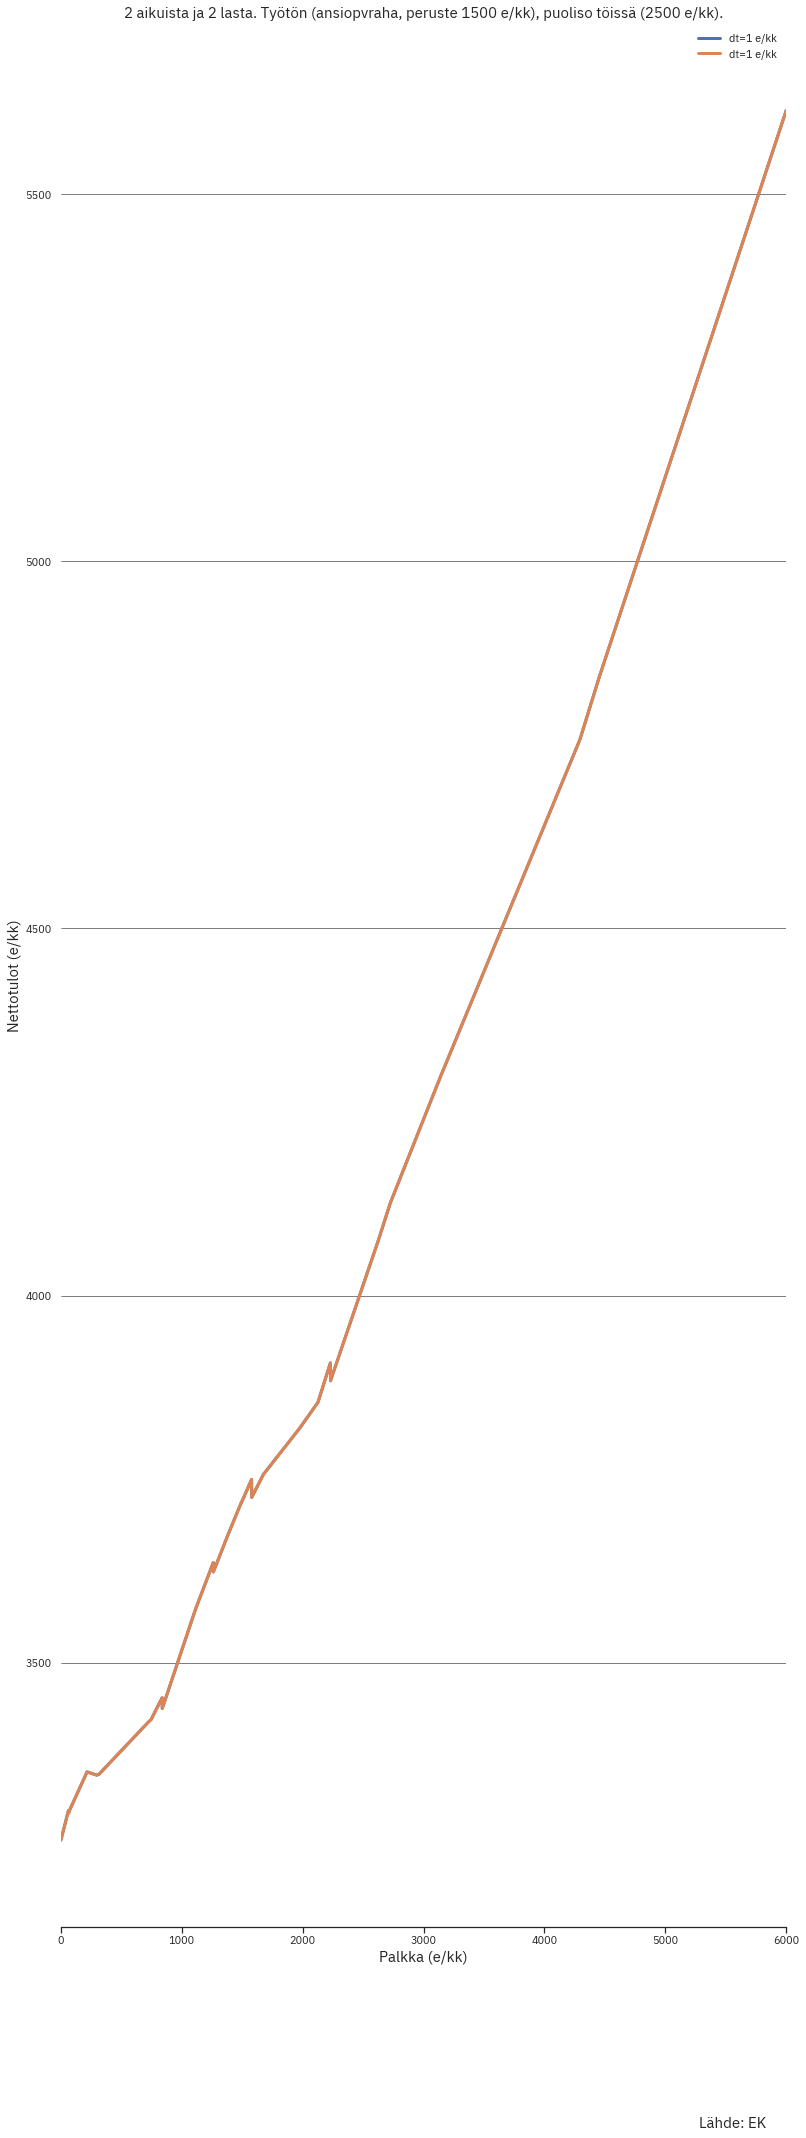

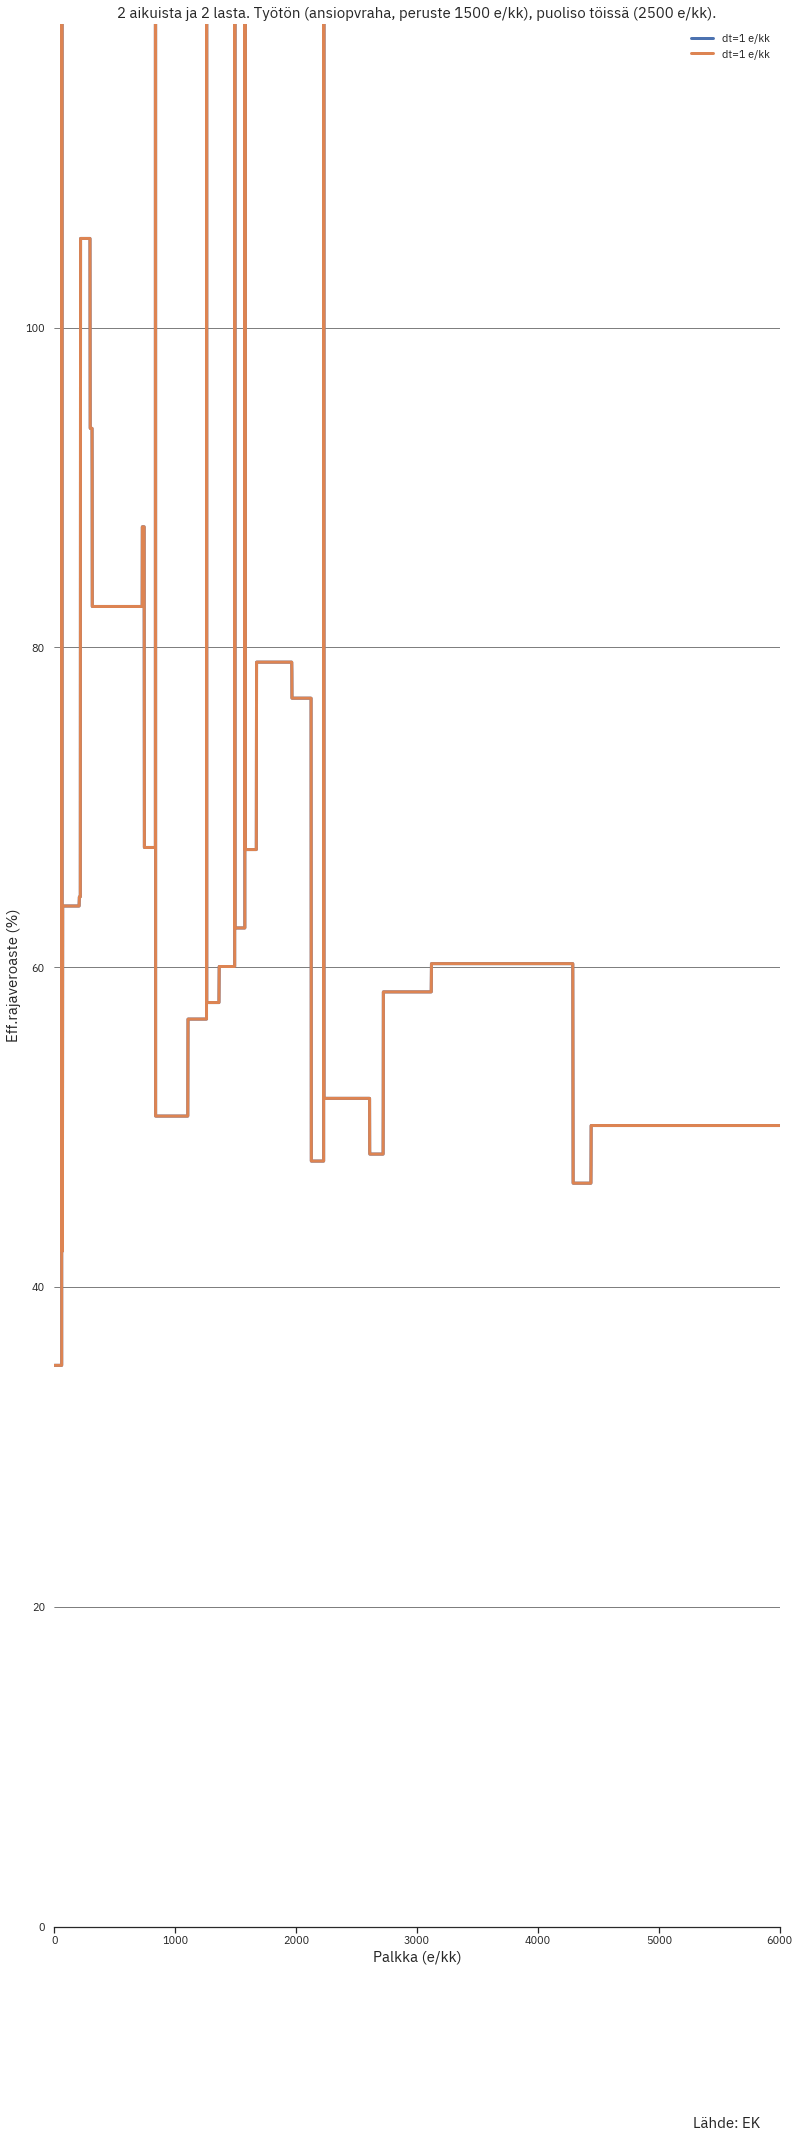

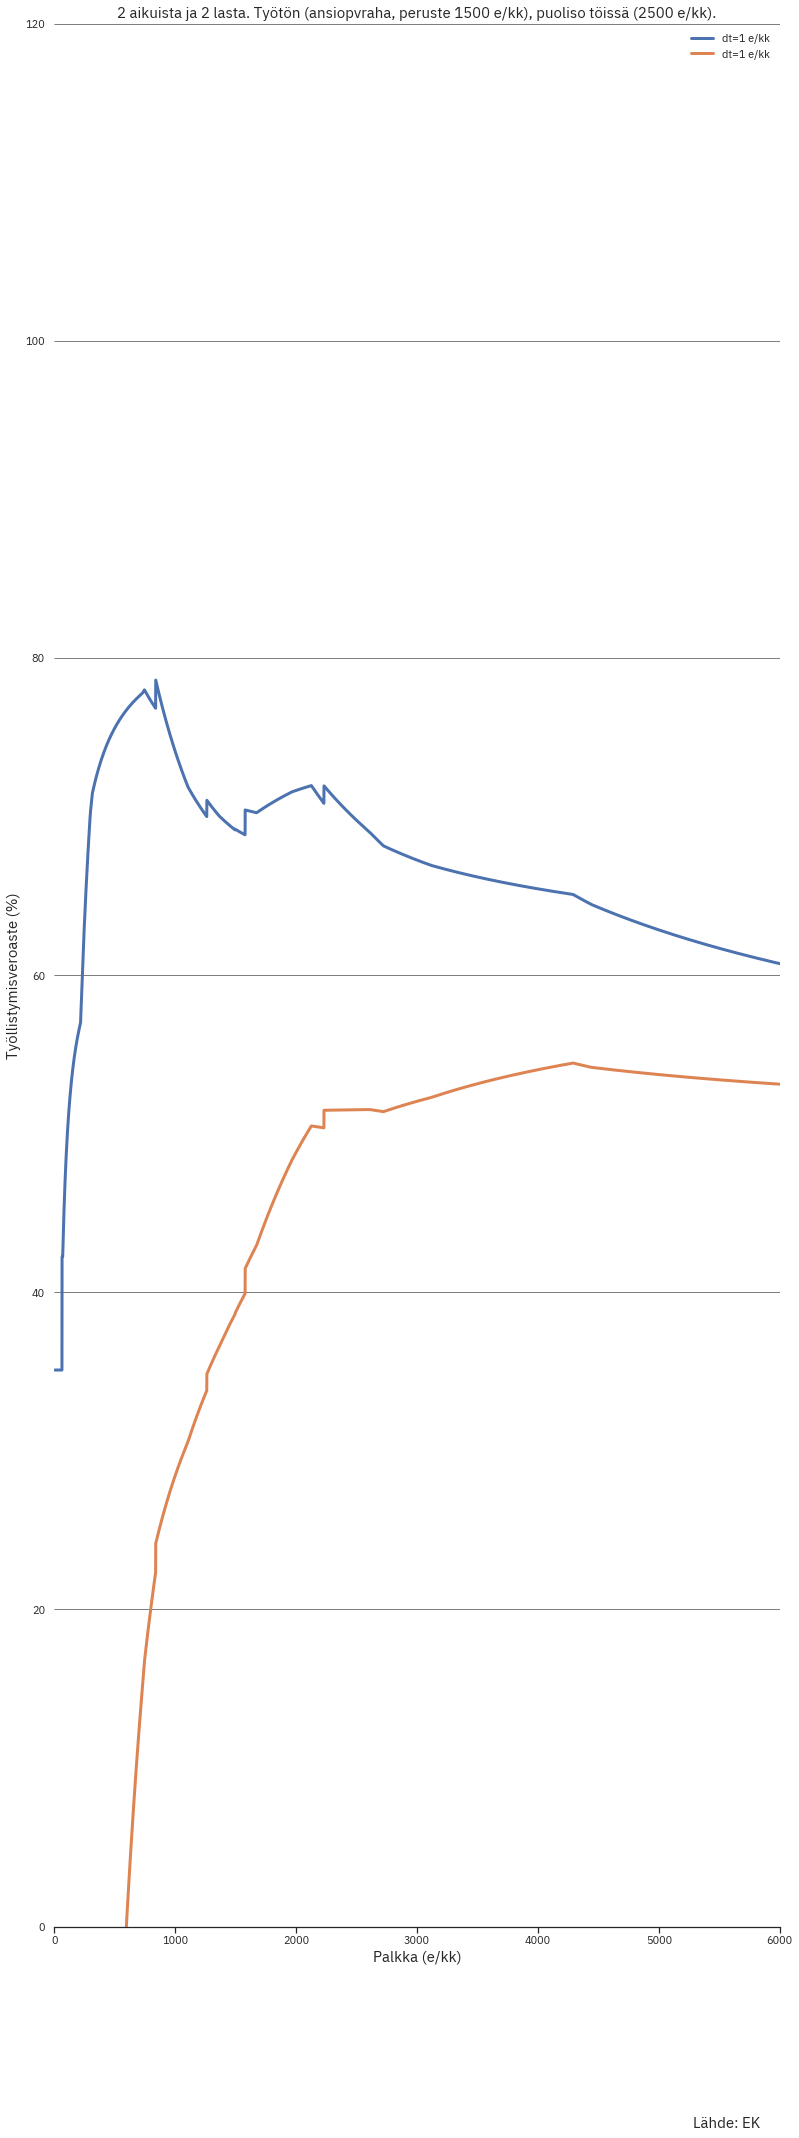

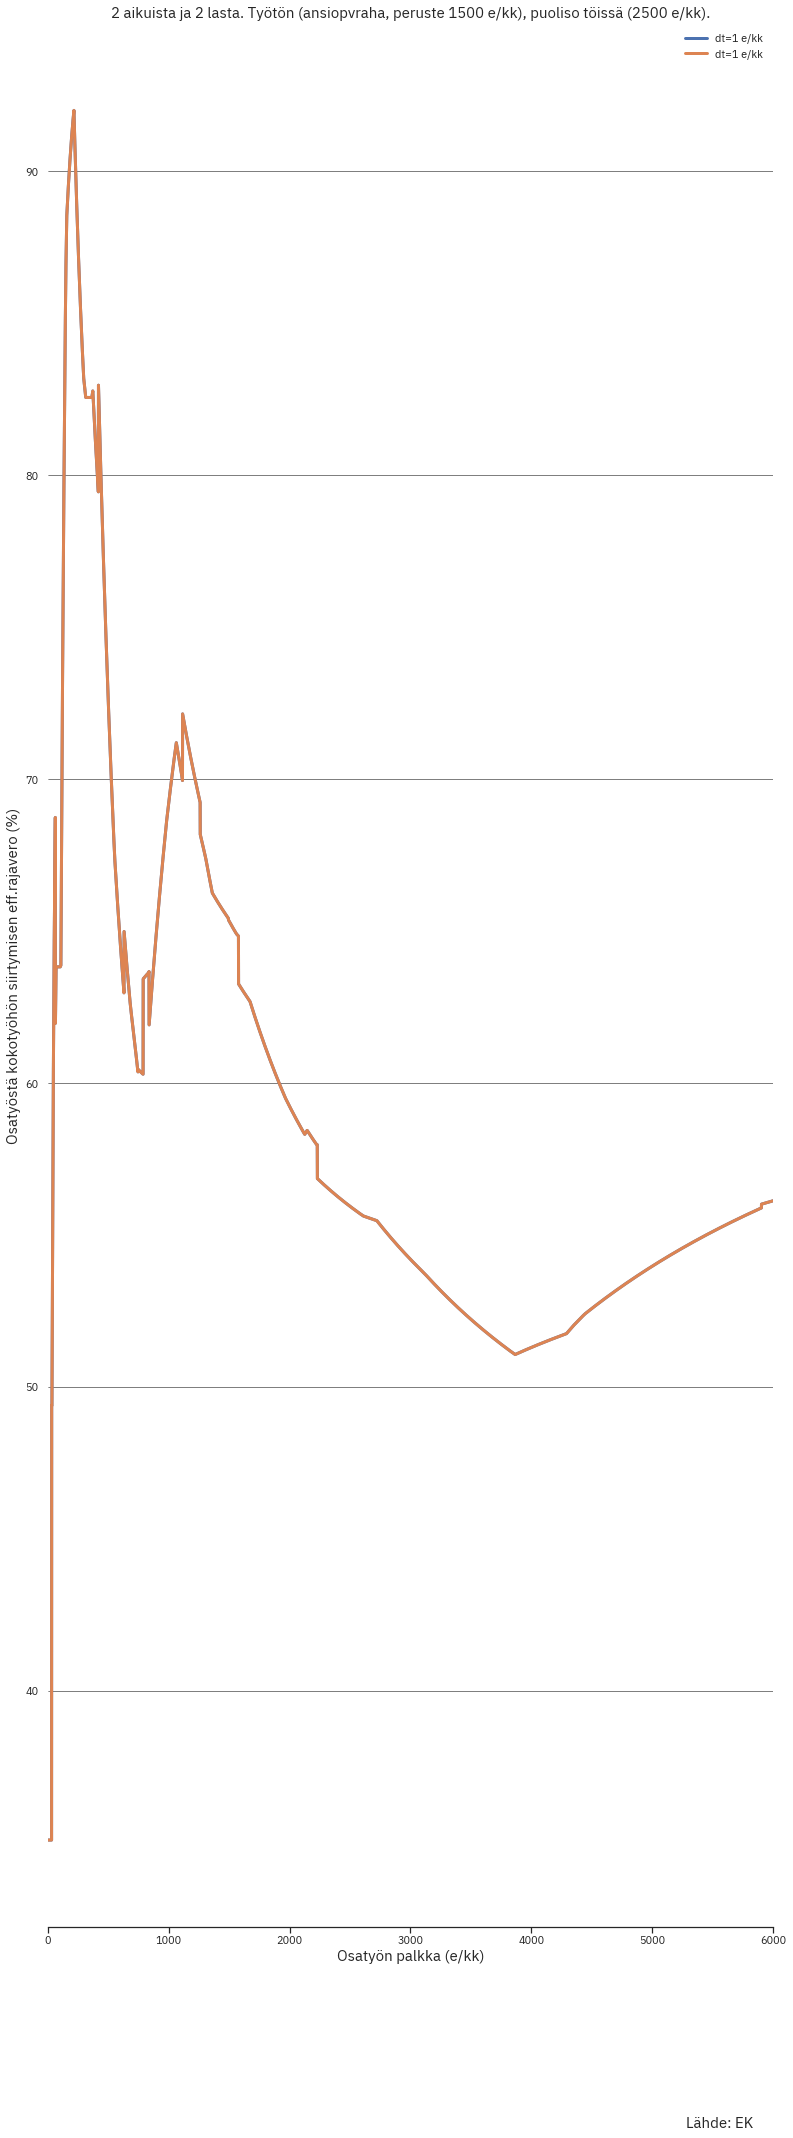

In [22]:
p3,selite=fin_benefits.perheparametrit(perhetyyppi=13,tulosta=True)

#base2netto,base2eff,base2tva,_=ben.laske_ja_plottaa(p3,plottaa=False)

dt1=1
base2netto,base2eff,base2tva,base2osatva=marg.laske_ja_plottaa_marginaalit(p3,plottaa=False,ret=True,dt=dt1,incl_alv=False)
#base2netto,base2eff,base2tva,base2osatva=marg.laske_ja_plottaa(p3,plottaa=False,dt=dt1,incl_alv=False)

# ja lasketaan & plotataan tulokset
dt=1
_,_,_,_=marg.laske_ja_plottaa(p3,basenetto=base2netto,baseeff=base2eff,basetva=base2tva,baseosatva=base2osatva,\
                           dt=dt,otsikko=f'dt={dt} e/kk',otsikkobase=f'dt={dt1} e/kk',incl_alv=False)

Kuten yllä olevat kuvat näyttävät, on valitulla lisäansioiden määrällä vaikutusta tuloksiin efektiivisessä marginaaliverossa, mutta ei työllistymisveroasteessa tai käteen jäävässä tulonmäärässä. Työllistymisveroaste ei riipu lisäansioiden määrästä, joten siinä ei pidäkään olla piikkejä. Jos lisäansio on pieni, ovat piikit efektiivisessä marginaaliverossa suuria johtuen kynnyksistä erilaisissa maksuissa, koska tällöin ansionlisäys voi viedä tulot yli kynnyksen.

# Eläkkeellä olevat

Verrataan työssäolevien nettotuloja työskentelevien vanhuuseläkeläisten nettotuloihin.

1 aikuinen, ei lapsia. Vanhuuseläkkeellä (työeläke 1500 e/kk), ei puolisoa


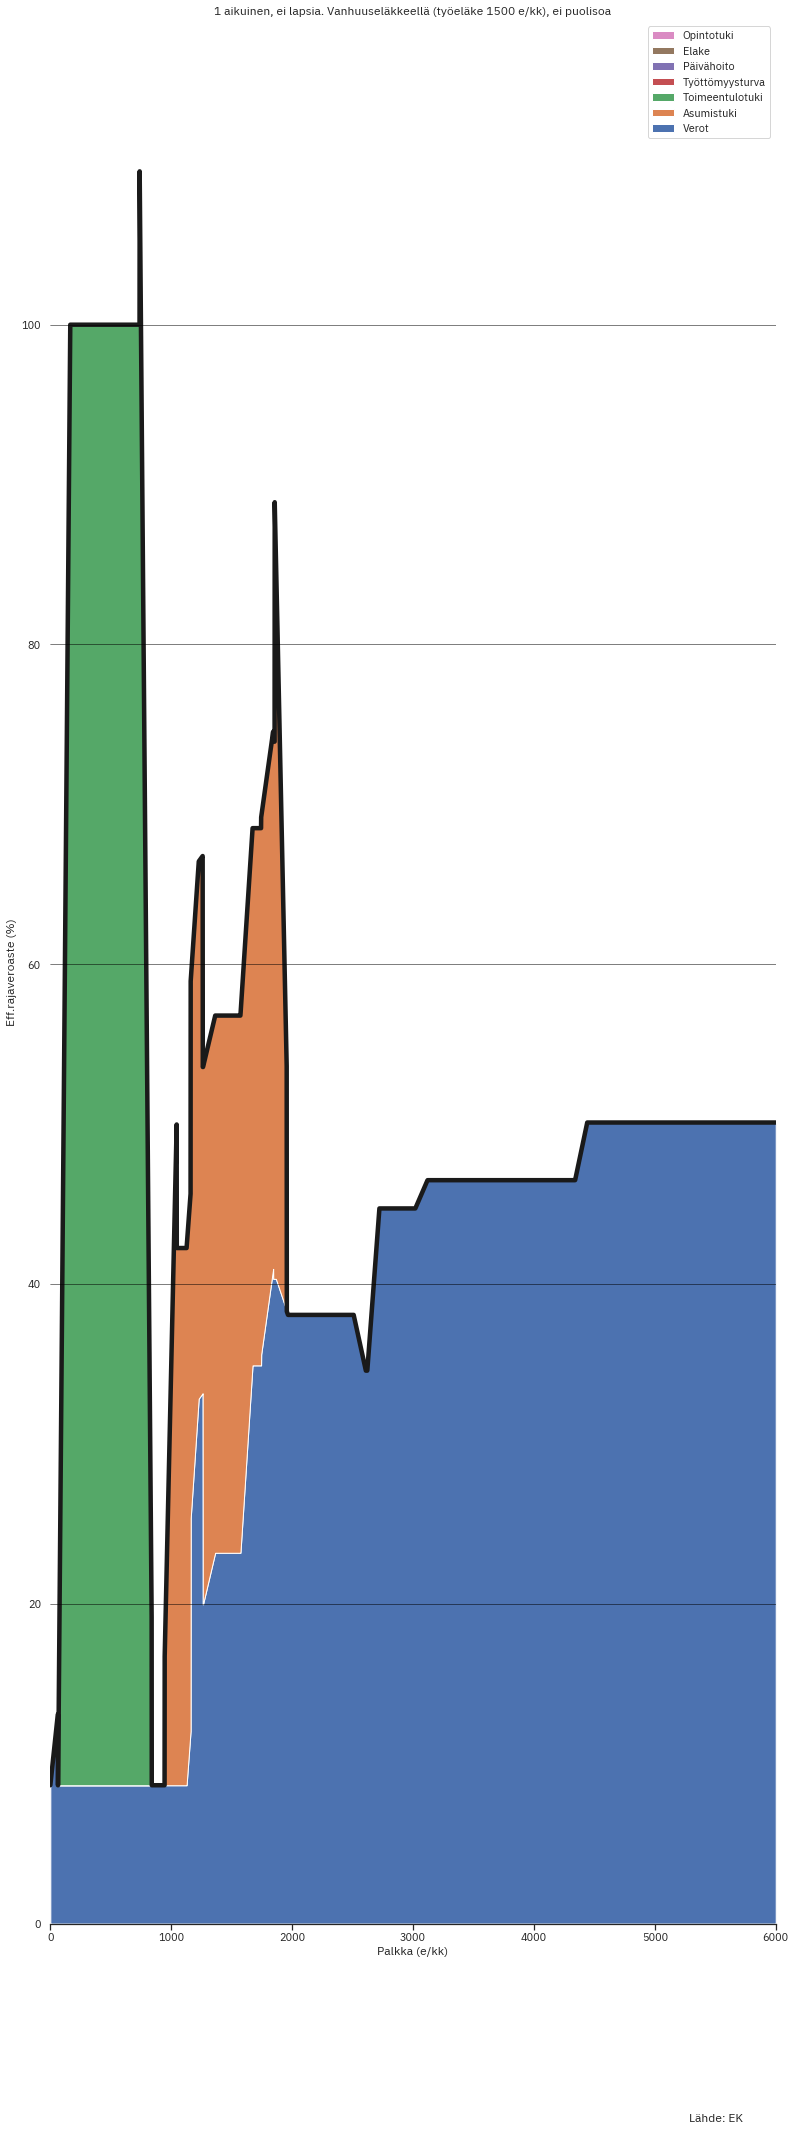

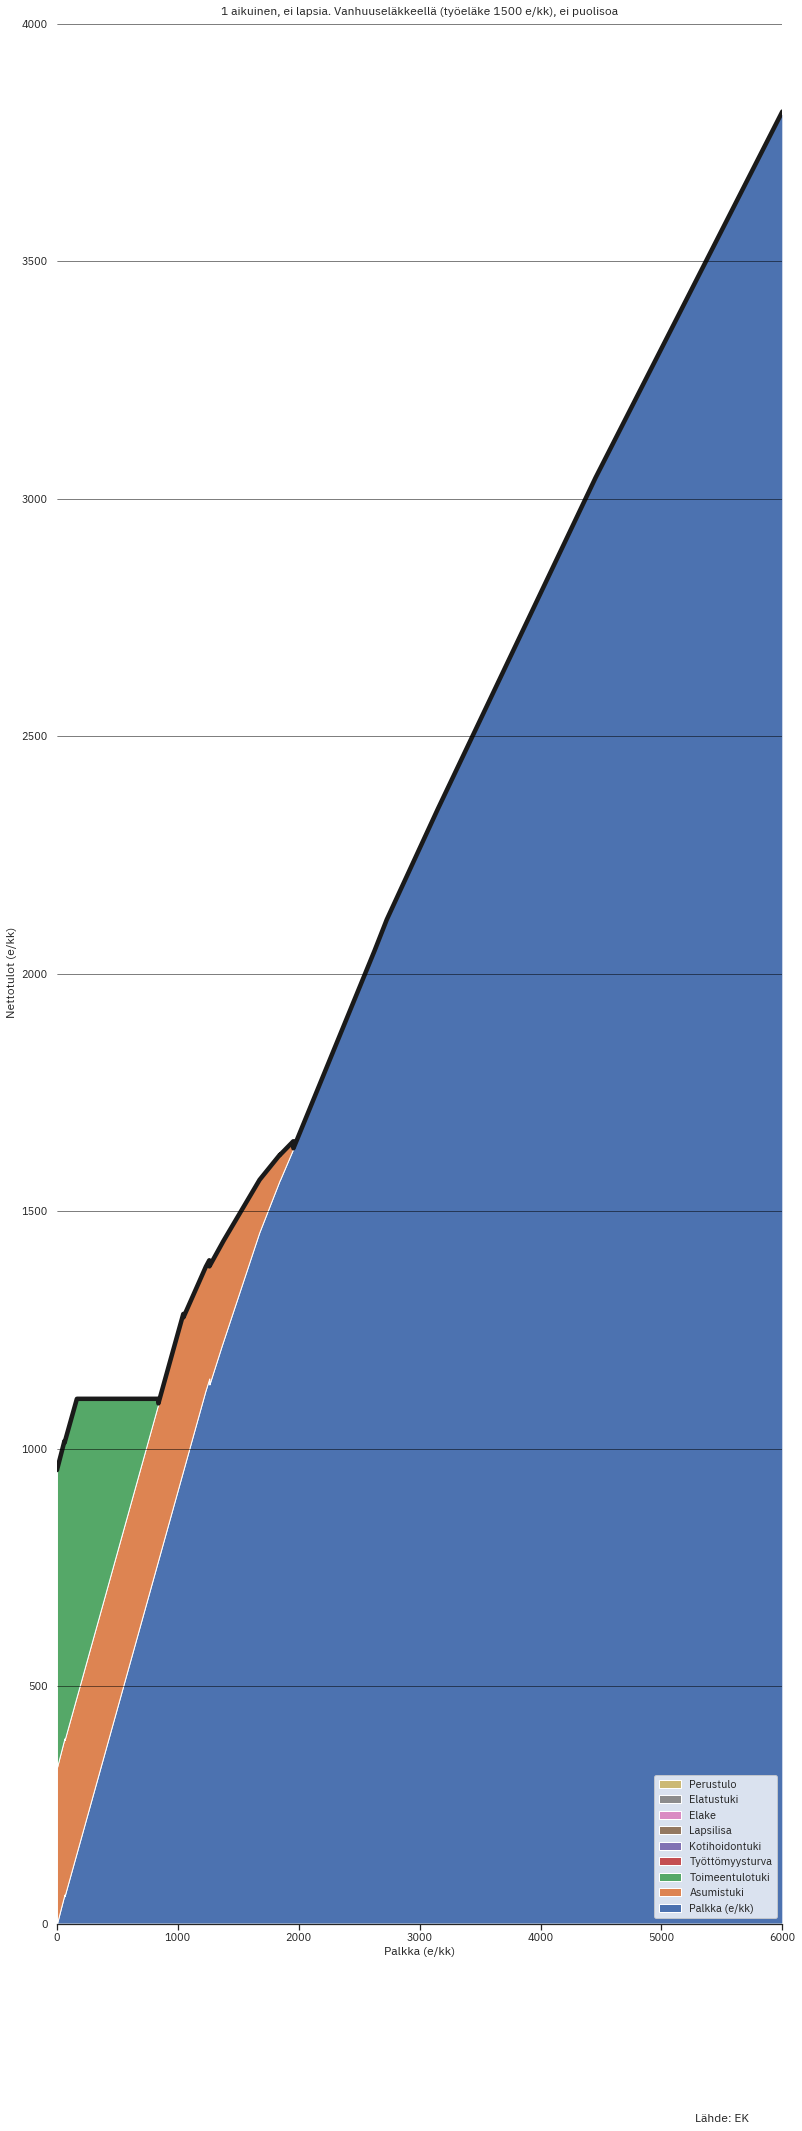

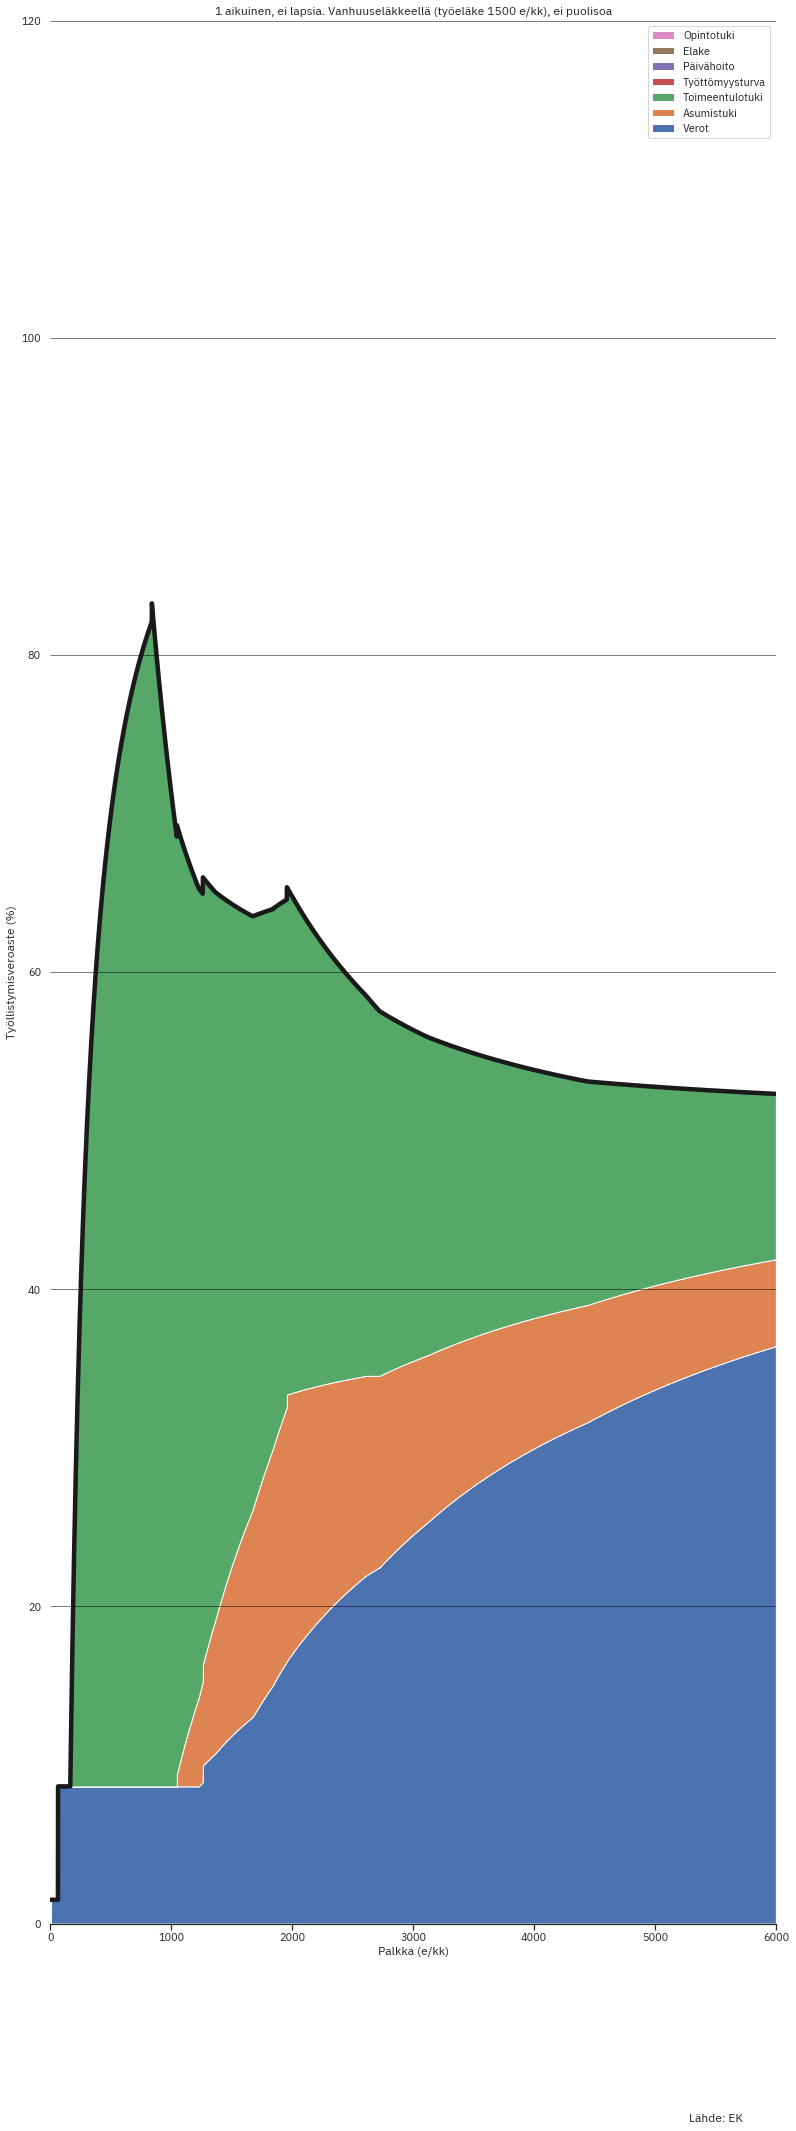

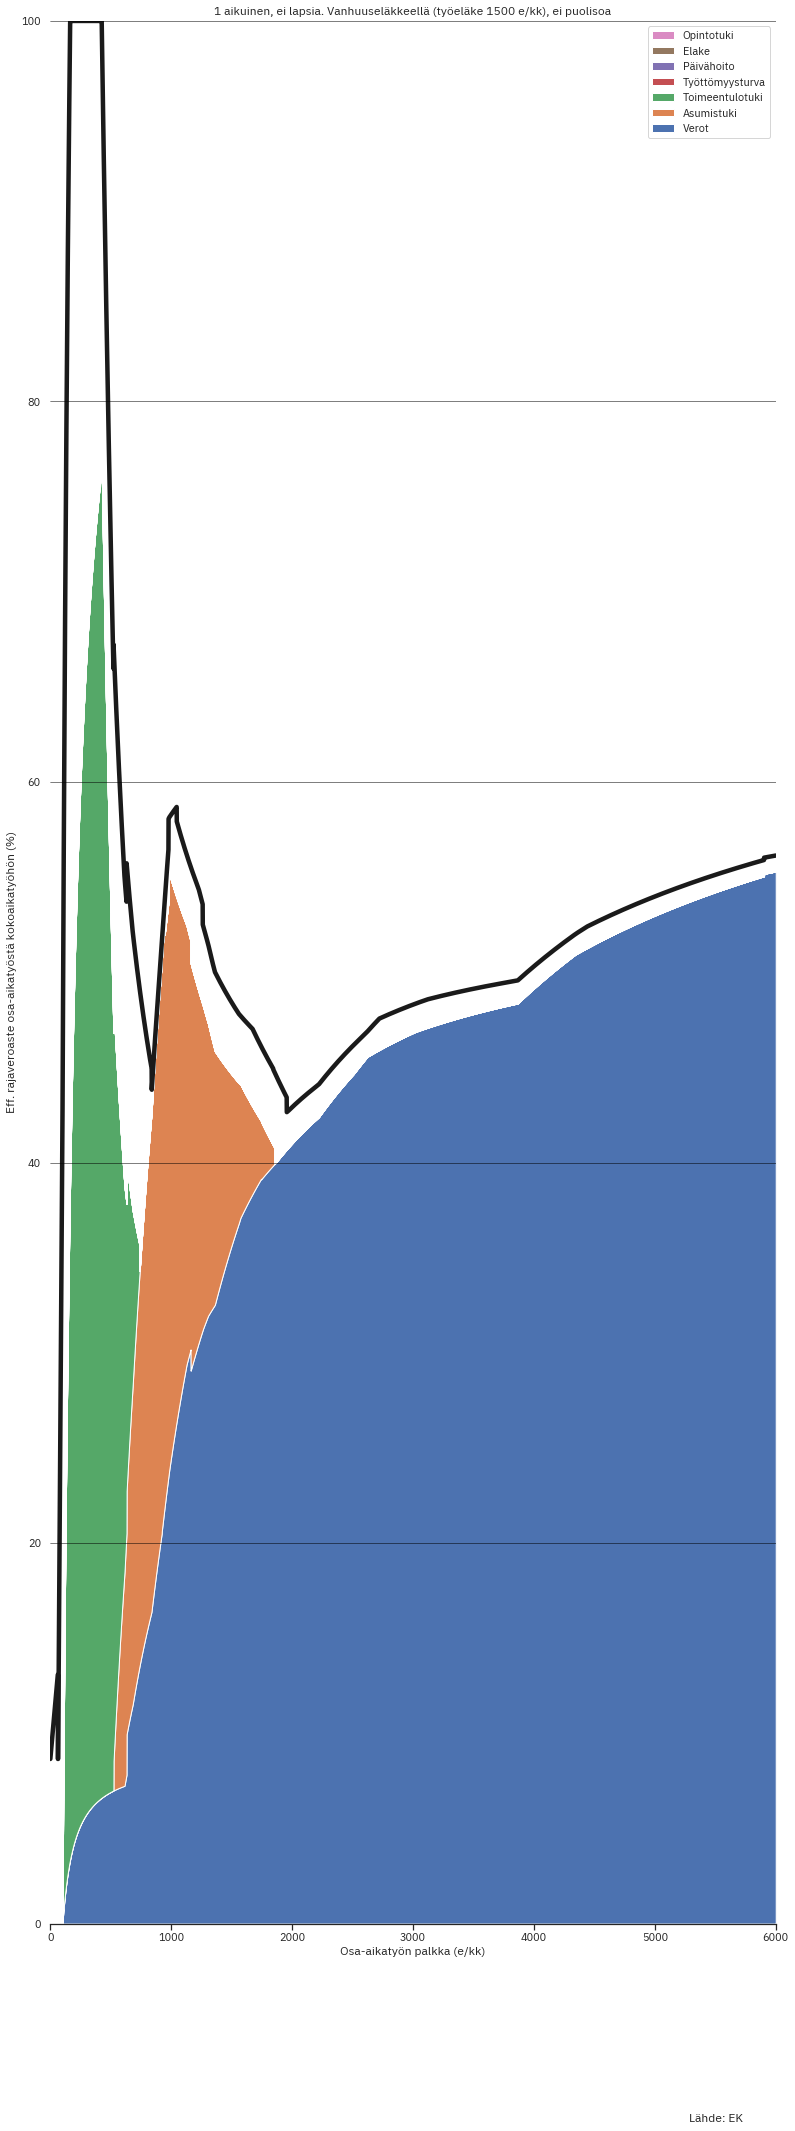

[ 0.          0.          0.         ... 55.29628225 55.29756232
 55.29884195] [100.         100.         100.         ...  56.96350466  56.96450681
  56.96550862] [ 8.65        8.7215      8.793      ... 56.13157291 56.13271373
 56.13385418]


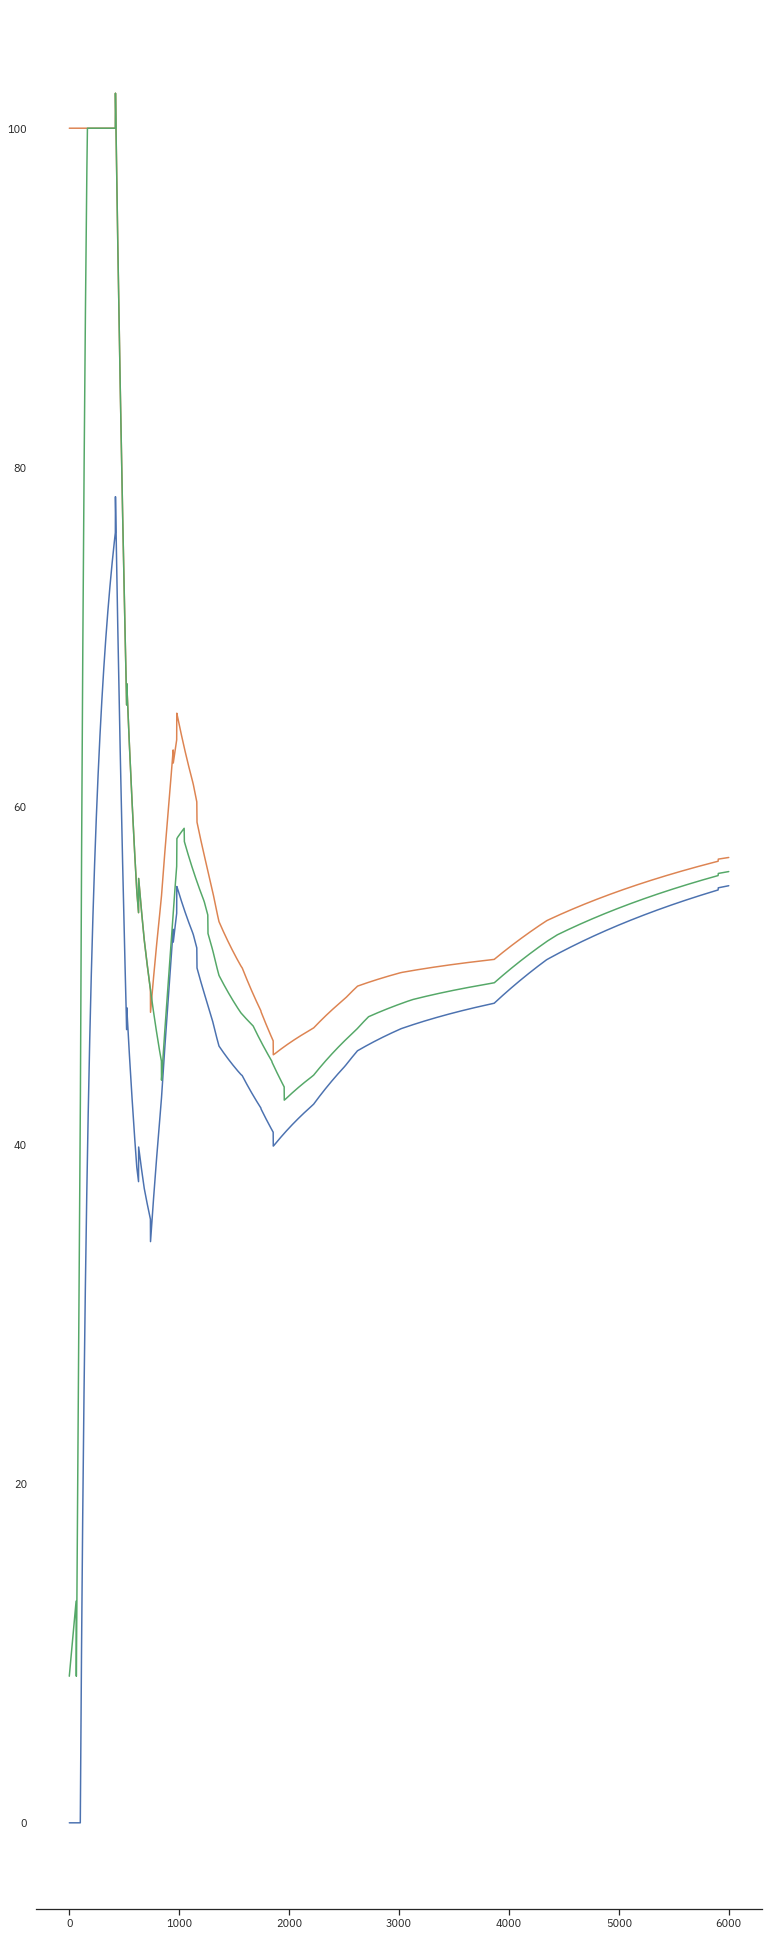

-12945.627070387081 : 1080.9198986366666 950.4636279327958
-6472.063535193536 : 1081.9048986366665 950.4636279327958
-4314.209023462362 : 1082.8898986366667 950.4636279327958
-3235.2817675967685 : 1083.8748986366666 950.4636279327958
-2587.9254140774174 : 1084.8598986366667 950.4636279327958
-2156.354511731179 : 1085.8448986366666 950.4636279327958
-1848.08958148387 : 1086.8298986366667 950.4636279327958
-1616.890883798385 : 1087.8148986366666 950.4636279327958
-1437.0696744874522 : 1088.7998986366665 950.4636279327958
-1293.2127070387082 : 1089.7848986366666 950.4636279327958
-1175.51155185337 : 1090.7698986366665 950.4636279327958
-1077.4272558655903 : 1091.7548986366667 950.4636279327958
-994.4328515682365 : 1092.7398986366666 950.4636279327958
-923.2947907419348 : 1093.7248986366667 950.4636279327958
-861.6418046924717 : 1094.7098986366666 950.4636279327958
-807.6954418991918 : 1095.6948986366665 950.4636279327958
-760.0957100227694 : 1096.6798986366666 950.4636279327958
-717.78483

-45.28608260621512 : 1227.9600457106667 950.4636279327958
-44.89276884993269 : 1228.6577441246666 950.4636279327958
-44.50353088387091 : 1229.3554425386667 950.4636279327958
-44.118305680345756 : 1230.0531409526666 950.4636279327958
-43.73703150454917 : 1230.7508393666667 950.4636279327958
-43.35964788156672 : 1231.4485377806666 950.4636279327958
-42.986095564401474 : 1232.1462361946667 950.4636279327958
-42.61631650296505 : 1232.8439346086666 950.4636279327958
-42.25025381400547 : 1233.5416330226667 950.4636279327958
-41.887851751935386 : 1234.2393314366666 950.4636279327958
-41.52905568053278 : 1234.9370298506667 950.4636279327958
-41.17381204548059 : 1235.6347282646666 950.4636279327958
-40.82206834771964 : 1236.3324266786667 950.4636279327958
-40.47377311758371 : 1237.0301250926666 950.4636279327958
-40.12887588969312 : 1237.7278235066667 950.4636279327958
-39.787327178578046 : 1238.4255219206666 950.4636279327958
-39.44907845501009 : 1239.1232203346667 950.4636279327958
-39.114082

-1.2708490103636283 : 1332.2547287018667 950.4636279327958
-1.10212325510477 : 1332.6296538370918 950.4636279327958
-0.9342878732245152 : 1333.0045789723167 950.4636279327958
-0.7673358354594262 : 1333.3795041075416 950.4636279327958
-0.601260186344077 : 1333.7544292427667 950.4636279327958
-0.4360540432450266 : 1334.1293543779918 950.4636279327958
-0.2717105954101573 : 1334.5042795132167 950.4636279327958
-0.1082231030328229 : 1334.8792046484418 950.4636279327958


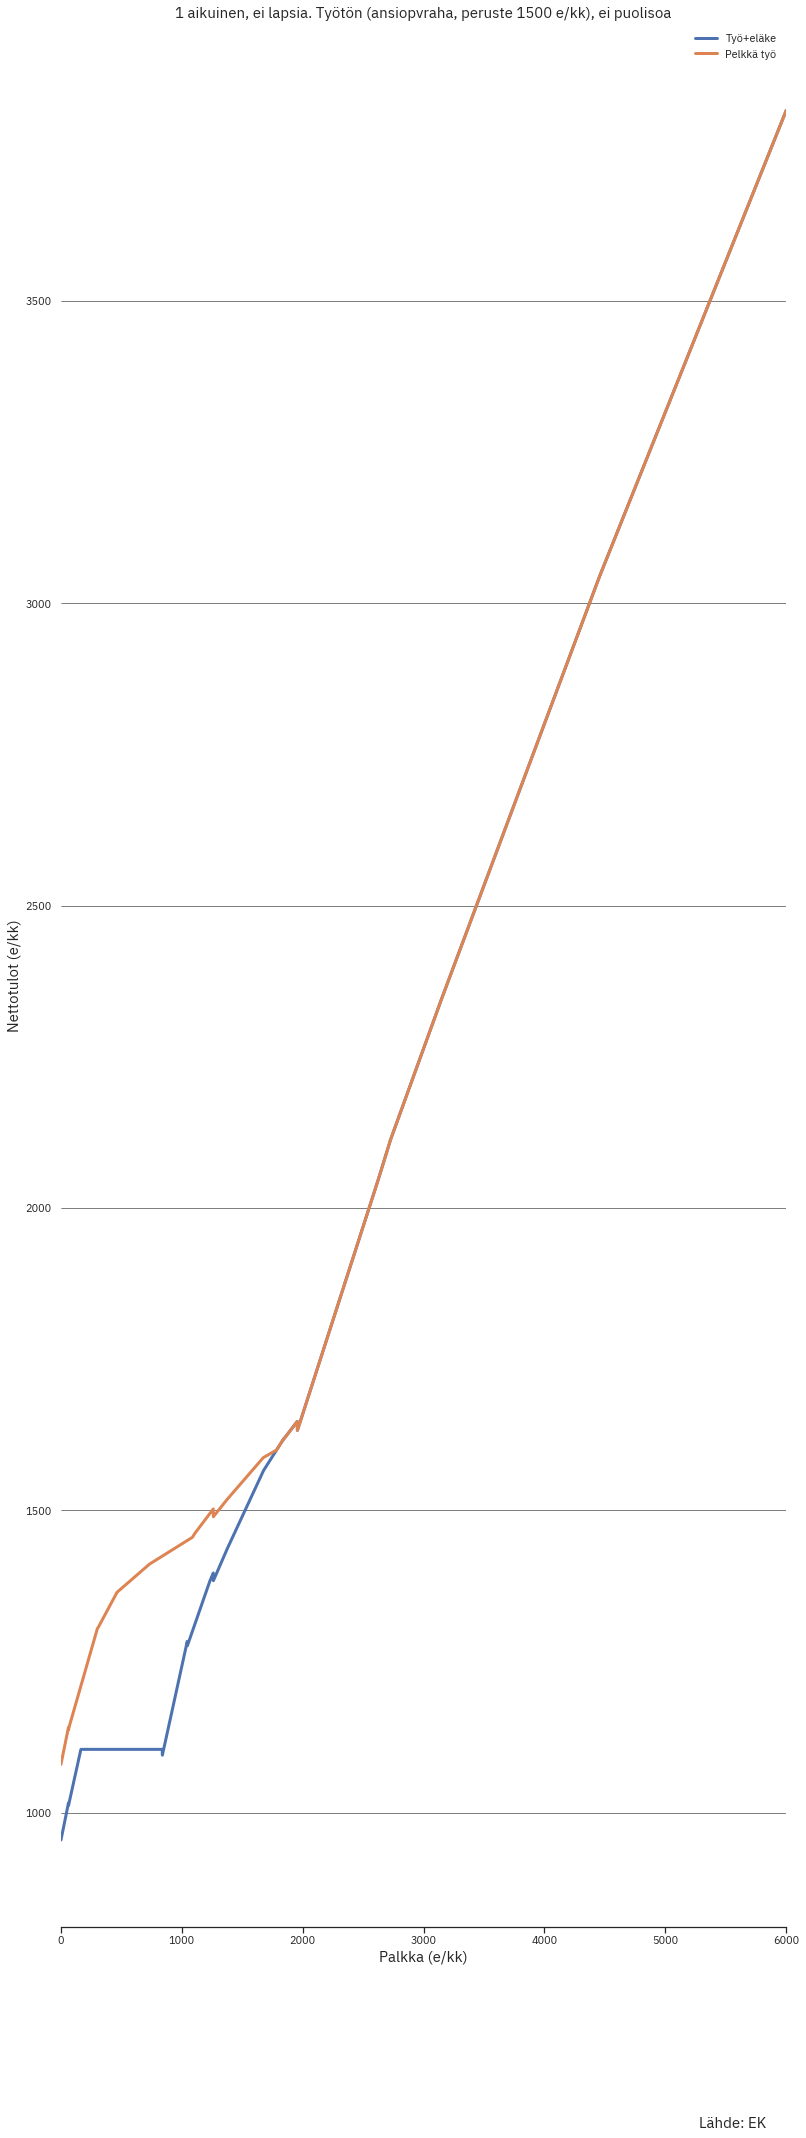

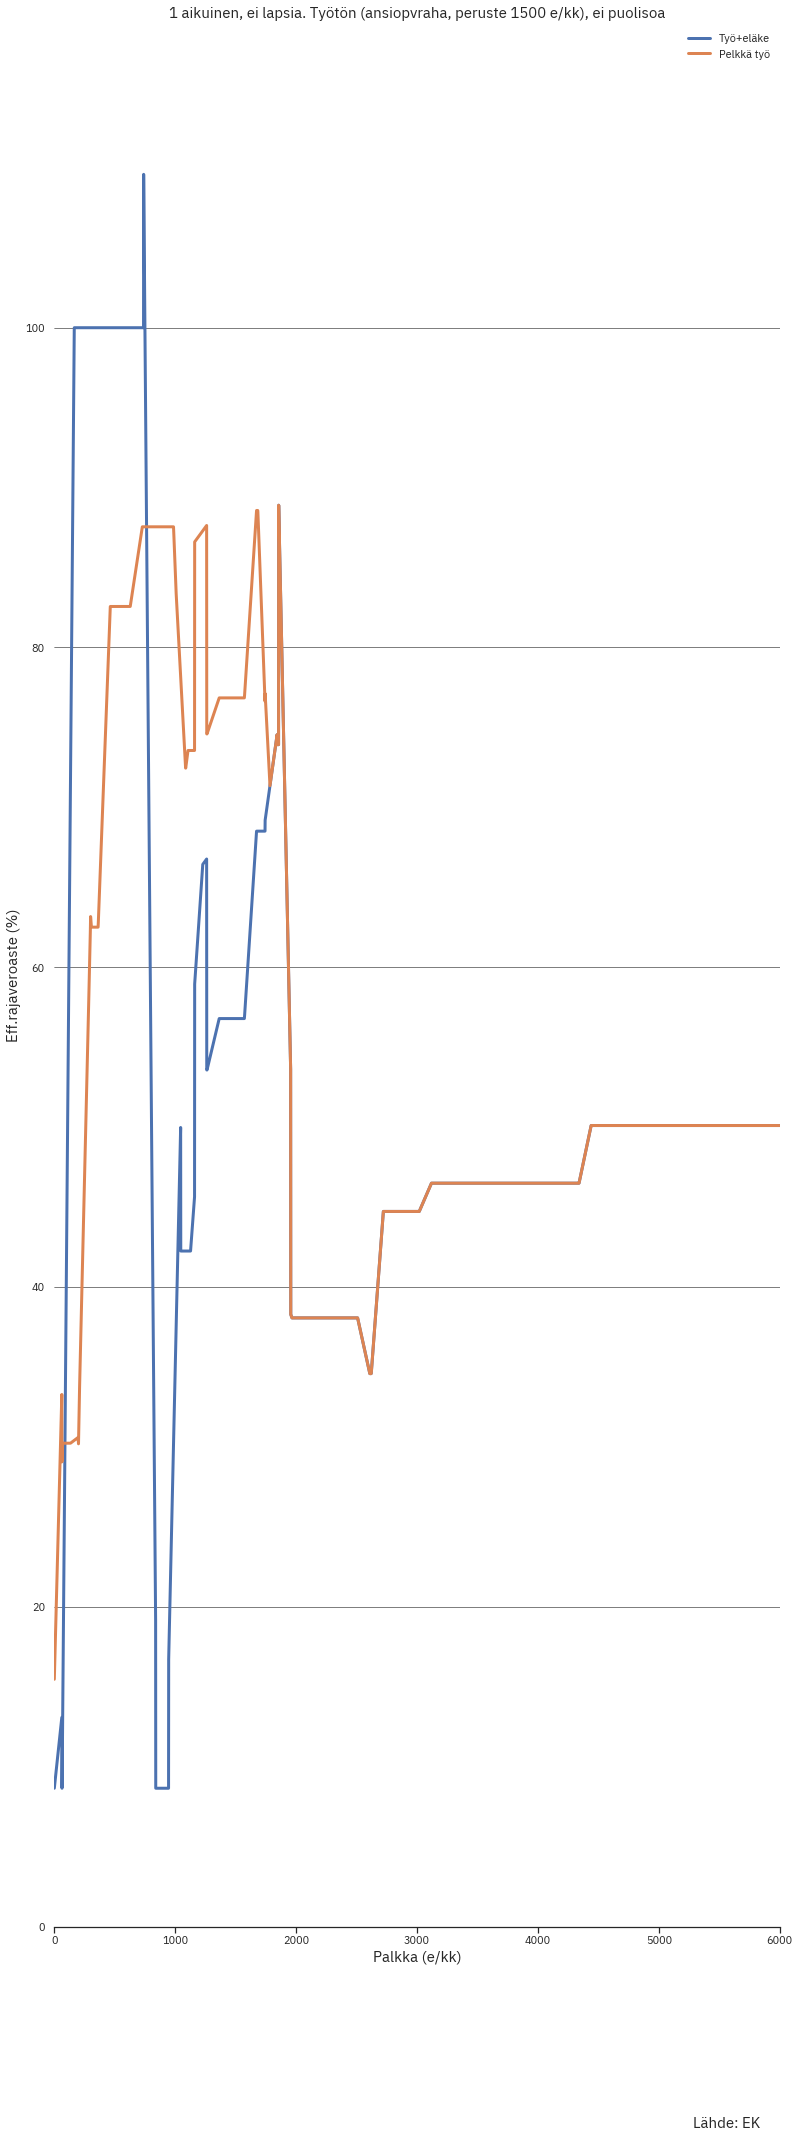

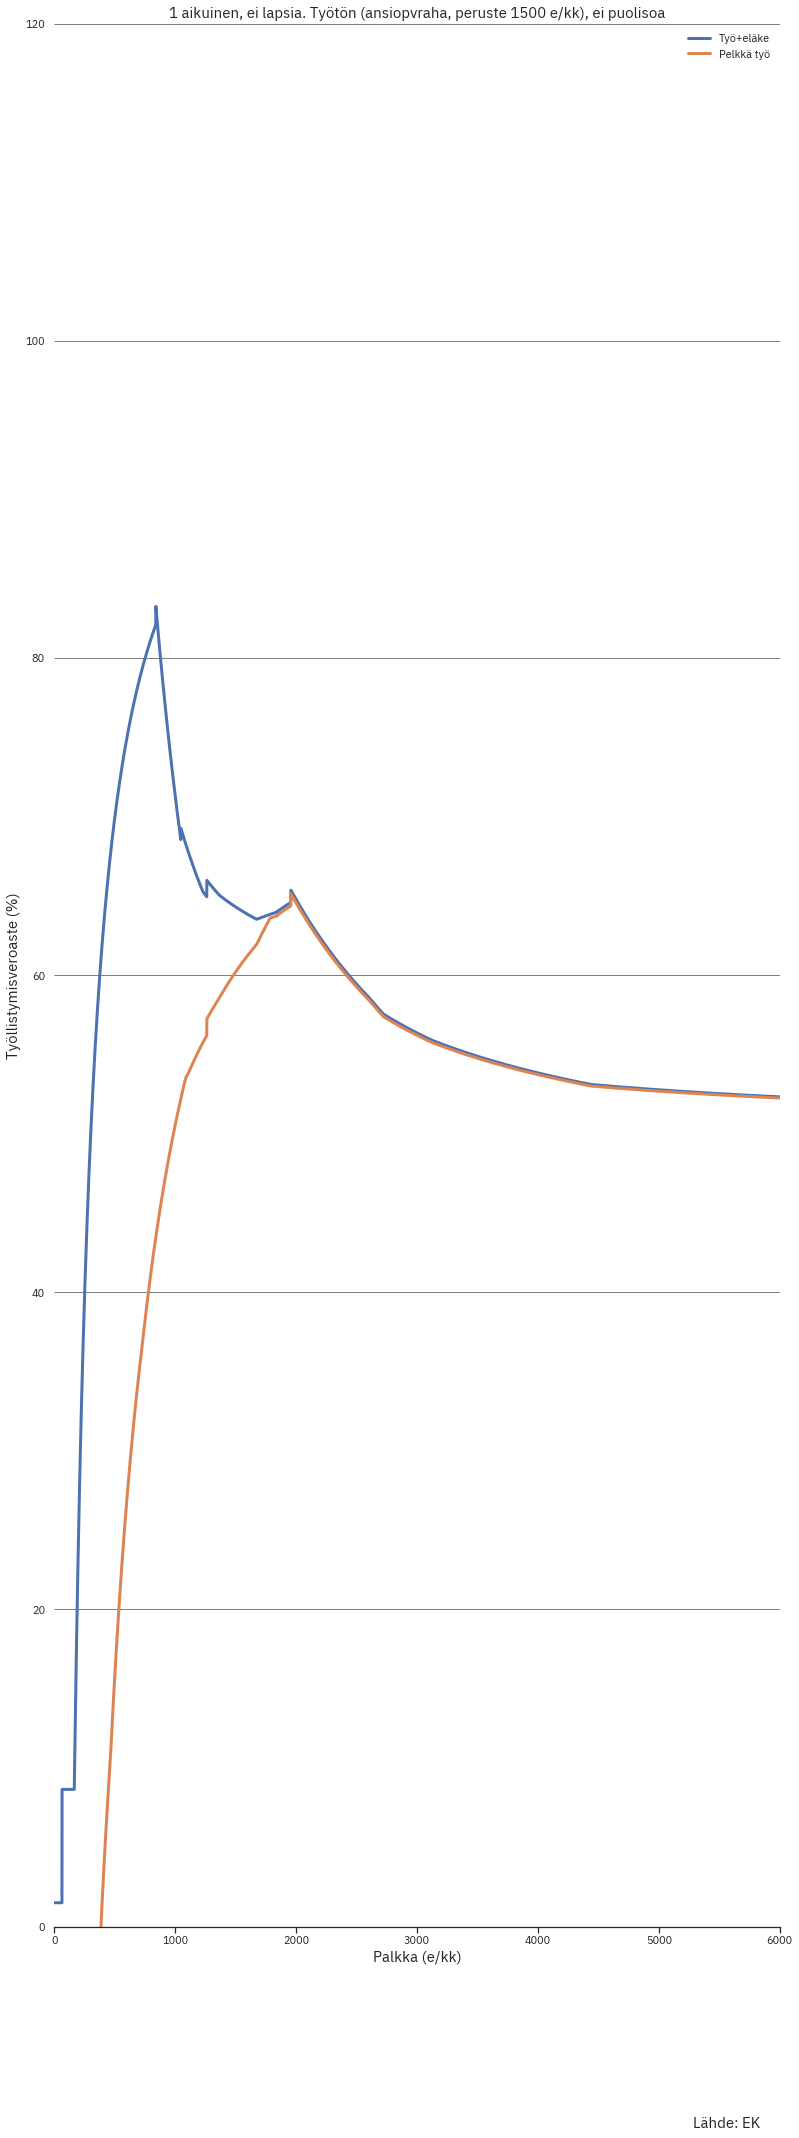

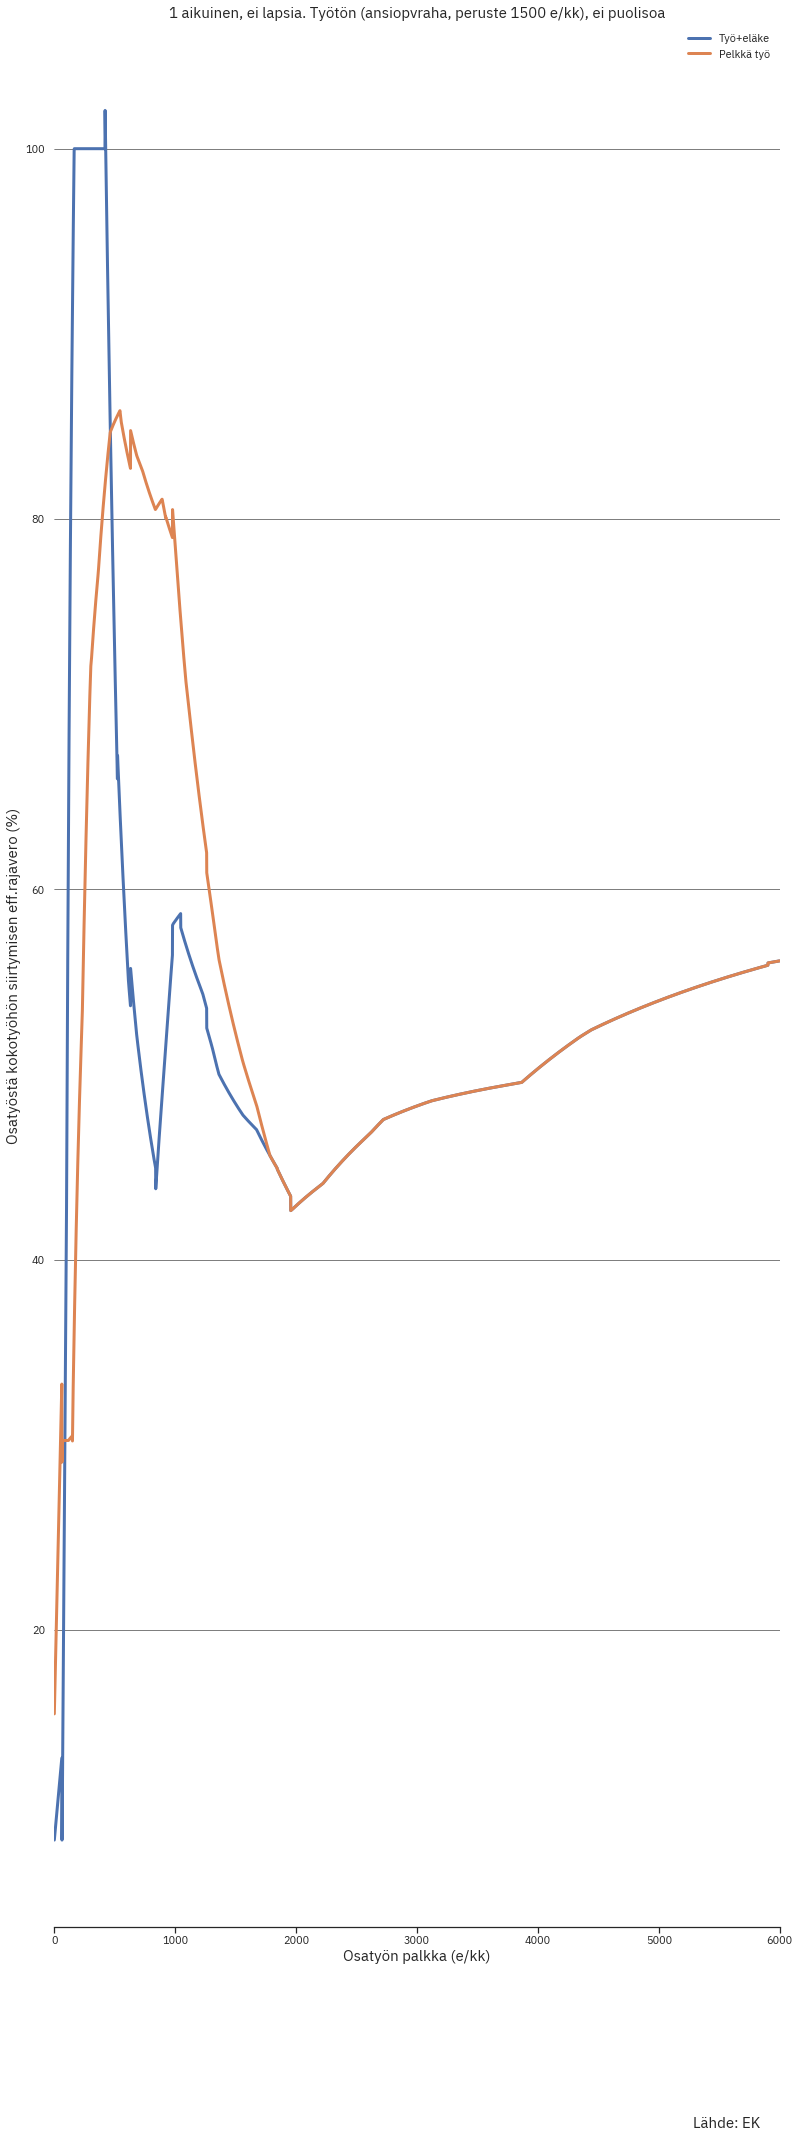

In [21]:
### Luokka Benefits() sisältää koodin
ben=fin_benefits.Benefits()

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg=fin_benefits.Marginals(ben,year=year)

p,selite=fin_benefits.perheparametrit(perhetyyppi=33,tulosta=True)

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa_marginaalit(p,ret=True)

# ja lasketaan & plotataan tulokset
_,_,_,_=marg.laske_ja_plottaa(p2,basenetto=basenetto,baseeff=baseeff,basetva=basetva,baseosatva=baseosatva,\
                           otsikko='Pelkkä työ',otsikkobase='Työ+eläke')

# Kunnallisveron lasku ja kannusteet

Testataan, miten kunnallisveron lasku -20 %-yksikköä vaikuttaisi kannusteisiin.

1 aikuinen, ei lapsia. Töissä, ei puolisoa
-10524.048387096775 : 955.805 849.5645161290322
-5261.274193548388 : 956.79 849.5645161290322
-3507.0161290322594 : 957.775 849.5645161290322
-2629.887096774195 : 958.76 849.5645161290322
-2103.609677419354 : 959.7449999999999 849.5645161290322
-1752.7580645161283 : 960.7299999999999 849.5645161290322
-1502.1497695852531 : 961.7149999999999 849.5645161290322
-1314.1935483870966 : 962.6999999999999 849.5645161290322
-1168.005376344086 : 963.685 849.5645161290322
-1051.0548387096776 : 964.67 849.5645161290322
-955.3680351906161 : 965.655 849.5645161290322
-875.6290322580649 : 966.64 849.5645161290322
-808.157568238213 : 967.6249999999999 849.5645161290322
-750.3248847926263 : 968.6099999999999 849.5645161290322
-700.2032258064513 : 969.5949999999999 849.5645161290322
-656.3467741935483 : 970.5799999999999 849.5645161290322
-617.6499051233396 : 971.5649999999999 849.5645161290322
-583.252688172043 : 972.55 849.5645161290322
-552.4762308998303 : 9

-26.364100926221656 : 1104.82 849.5645161290322
-25.741617670427463 : 1104.82 849.5645161290322
-25.12523719165085 : 1104.82 849.5645161290322
-24.514870180959882 : 1104.82 849.5645161290322
-23.910429063576565 : 1104.82 849.5645161290322
-23.31182795698925 : 1104.82 849.5645161290322
-22.718982630272944 : 1104.82 849.5645161290322
-22.13181046457786 : 1104.82 849.5645161290322
-21.55023041474655 : 1104.82 849.5645161290322
-20.974162972022615 : 1104.82 849.5645161290322
-20.403530127814975 : 1104.82 849.5645161290322
-19.83825533848251 : 1104.82 849.5645161290322
-19.27826349110642 : 1104.82 849.5645161290322
-18.723480870217557 : 1104.82 849.5645161290322
-18.173835125448036 : 1104.82 849.5645161290322
-17.629255240077303 : 1104.82 849.5645161290322
-17.089671500443913 : 1104.82 849.5645161290322
-16.55501546619531 : 1104.82 849.5645161290322
-16.02521994134898 : 1104.82 849.5645161290322
-15.500218946139244 : 1104.82 849.5645161290322
-14.979947689625117 : 1104.82 849.5645161290322


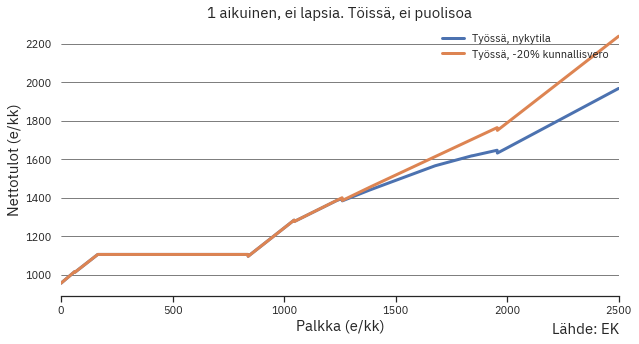

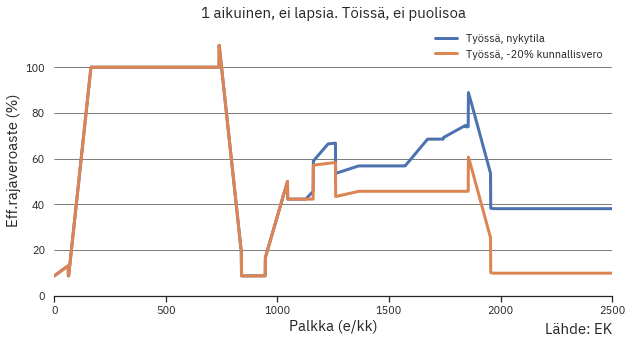

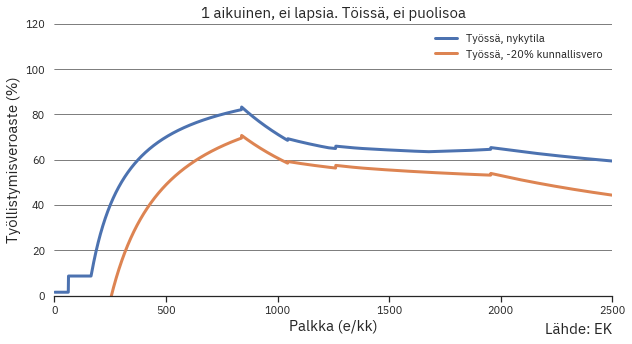

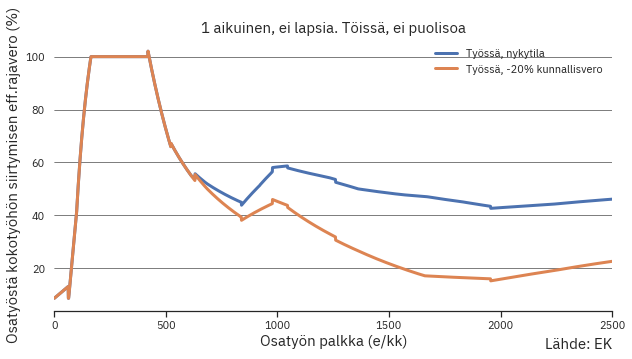

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa


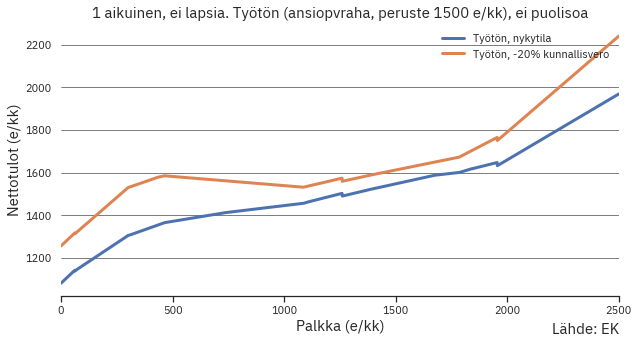

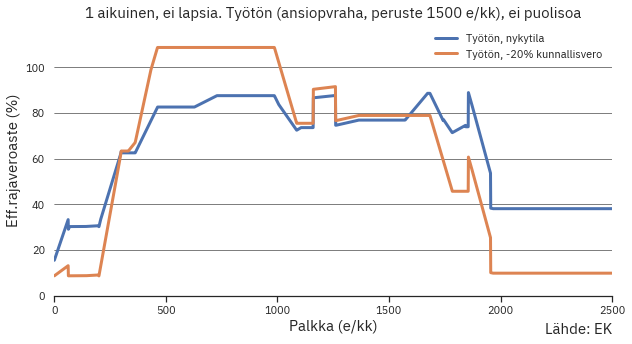

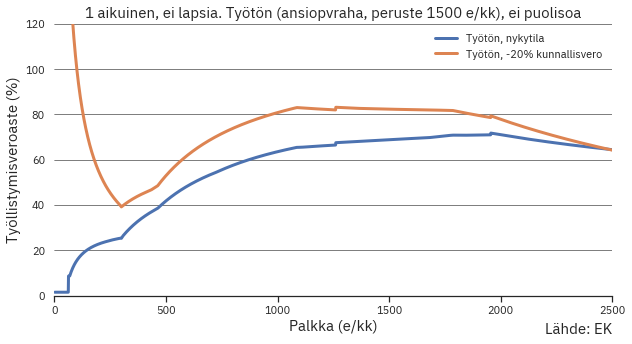

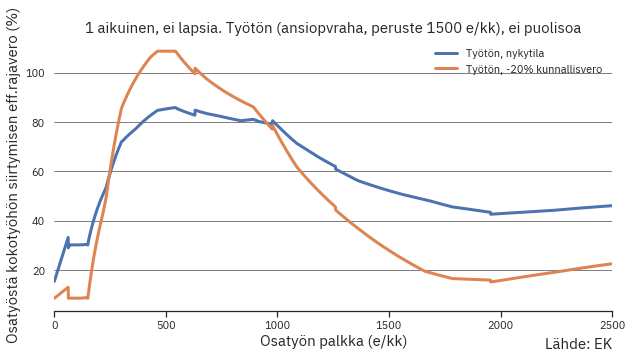

In [17]:
# Luokka Benefits() sisältää koodin
ben1=fin_benefits.Benefits()
ben2=fin_benefits.Benefits(additional_kunnallisvero=-0.20)

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg1=fin_benefits.Marginals(ben1,year=year)
marg2=fin_benefits.Marginals(ben2,year=year)

# Määritellään perhetyypit
p1,selite=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)

p1['t']=0
p1['vakiintunutpalkka']=1500

# ja lasketaan & plotataan tulokset
basenetto1,baseeff1,basetva1,baseosatva1=marg1.laske_ja_plottaa_marginaalit(p1,ret=True,plottaa=False,max_salary=2500)

# ja lasketaan & plotataan tulokset
_,_,_,_=marg2.laske_ja_plottaa(p1,basenetto=basenetto1,baseeff=baseeff1,basetva=basetva1,baseosatva=baseosatva1,
                              otsikko='Työssä, -20% kunnallisvero',otsikkobase='Työssä, nykytila',
                              max_salary=2500,figname='kannusteet_työssä',grayscale=True)

# ja lasketaan & plotataan tulokset
p2,selite=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)
p2['t']=1250
p2['vakiintunutpalkka']=1500
basenetto2,baseeff2,basetva2,baseosatva2=marg1.laske_ja_plottaa_marginaalit(p2,ret=True,plottaa=False,max_salary=2500)
_,_,_,_=marg2.laske_ja_plottaa(p2,basenetto=basenetto2,baseeff=baseeff2,basetva=basetva2,baseosatva=baseosatva2,
                              otsikko='Työtön, -20% kunnallisvero',otsikkobase='Työtön, nykytila',
                              max_salary=2500,figname='kannusteet_työtön',grayscale=True)




1 aikuinen, ei lapsia. Töissä, ei puolisoa
-10524.048387096775 : 955.805 849.5645161290322
-5261.274193548388 : 956.79 849.5645161290322
-3507.0161290322594 : 957.775 849.5645161290322
-2629.887096774195 : 958.76 849.5645161290322
-2103.609677419354 : 959.7449999999999 849.5645161290322
-1752.7580645161283 : 960.7299999999999 849.5645161290322
-1502.1497695852531 : 961.7149999999999 849.5645161290322
-1314.1935483870966 : 962.6999999999999 849.5645161290322
-1168.005376344086 : 963.685 849.5645161290322
-1051.0548387096776 : 964.67 849.5645161290322
-955.3680351906161 : 965.655 849.5645161290322
-875.6290322580649 : 966.64 849.5645161290322
-808.157568238213 : 967.6249999999999 849.5645161290322
-750.3248847926263 : 968.6099999999999 849.5645161290322
-700.2032258064513 : 969.5949999999999 849.5645161290322
-656.3467741935483 : 970.5799999999999 849.5645161290322
-617.6499051233396 : 971.5649999999999 849.5645161290322
-583.252688172043 : 972.55 849.5645161290322
-552.4762308998303 : 9

-35.055811571940595 : 1104.82 849.5645161290322
-34.34499151103576 : 1104.8200000000002 849.5645161290322
-33.64161459212971 : 1104.82 849.5645161290322
-32.945564516129025 : 1104.82 849.5645161290322
-32.256727394283914 : 1104.8200000000002 849.5645161290322
-31.574991686065836 : 1104.82 849.5645161290322
-30.90024813895782 : 1104.82 849.5645161290322
-30.232389730085707 : 1104.8200000000002 849.5645161290322
-29.571311609628292 : 1104.82 849.5645161290322
-28.916911045943294 : 1104.82 849.5645161290322
-28.2690873723457 : 1104.8200000000002 849.5645161290322
-27.627741935483876 : 1104.82 849.5645161290322
-26.99277804525757 : 1104.82 849.5645161290322
-26.364100926221656 : 1104.82 849.5645161290322
-25.741617670427573 : 1104.8200000000002 849.5645161290322
-25.12523719165085 : 1104.82 849.5645161290322
-24.514870180959882 : 1104.82 849.5645161290322
-23.91042906357668 : 1104.8200000000002 849.5645161290322
-23.31182795698925 : 1104.82 849.5645161290322
-22.718982630272944 : 1104.82 8

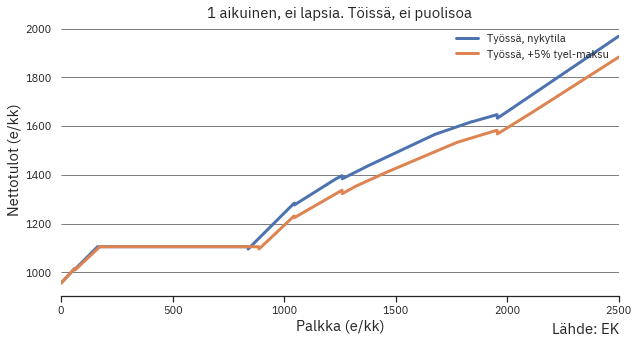

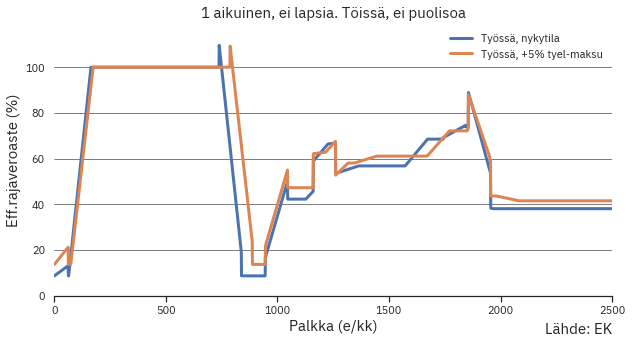

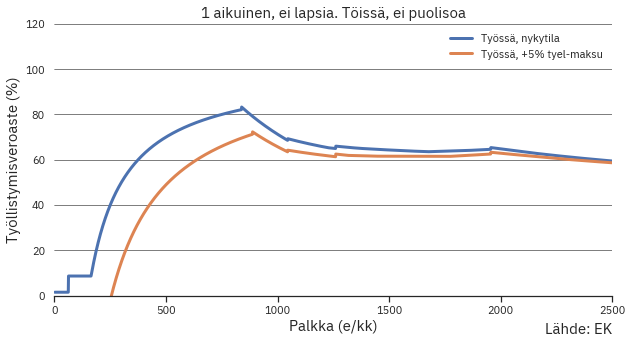

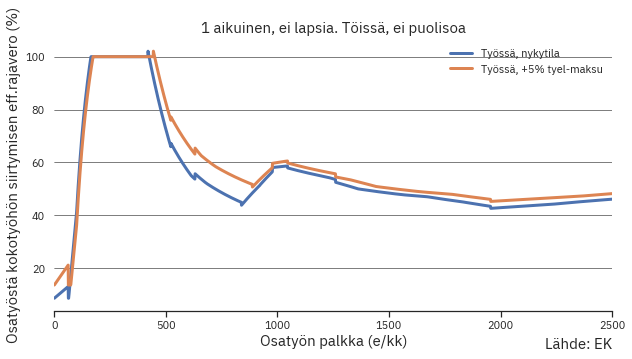

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa
-13107.40392845163 : 1089.2783696366669 957.2043303521506
-6552.951964225809 : 1090.2633696366668 957.2043303521506
-4368.134642817203 : 1091.2483696366667 957.2043303521506
-3275.7259821129055 : 1092.2333696366668 957.2043303521506
-2620.2807856903223 : 1093.2183696366667 957.2043303521506
-2183.317321408604 : 1094.2033696366668 957.2043303521506
-1871.2005612073735 : 1095.1883696366667 957.2043303521506
-1637.1129910564534 : 1096.1733696366668 957.2043303521506
-1455.0448809390684 : 1097.1583696366667 957.2043303521506
-1309.3903928451607 : 1098.1433696366666 957.2043303521506
-1190.2185389501471 : 1099.1283696366668 957.2043303521506
-1090.908660704301 : 1100.1133696366667 957.2043303521506
-1006.8772252655094 : 1101.0983696366668 957.2043303521506
-934.8502806036865 : 1102.0833696366667 957.2043303521506
-872.4269285634417 : 1103.0683696366668 957.2043303521506
-817.8064955282259 : 1104.0533696366667 957.20

-51.17046421091287 : 1241.4048030686668 957.2043303521506
-50.75997848175462 : 1242.1406896826668 957.2043303521506
-50.35381365500855 : 1242.8765762966668 957.2043303521506
-49.951901863097525 : 1243.6124629106669 957.2043303521506
-49.55417665235213 : 1244.3483495246667 957.2043303521506
-49.16057294638141 : 1245.0842361386667 957.2043303521506
-48.77102701057534 : 1245.8201227526667 957.2043303521506
-48.385476417700616 : 1246.5560093666668 957.2043303521506
-48.003860014549105 : 1247.2918959806668 957.2043303521506
-47.626117889602185 : 1248.0277825946669 957.2043303521506
-47.2521913416748 : 1248.7636692086667 957.2043303521506
-46.8820228495056 : 1249.4995558226667 957.2043303521506
-46.515556042258076 : 1250.2354424366667 957.2043303521506
-46.15273567090359 : 1250.9713290506668 957.2043303521506
-45.79350758045357 : 1251.7072156646668 957.2043303521506
-45.43781868301284 : 1252.4431022786666 957.2043303521506
-45.08561693162554 : 1253.1789888926667 957.2043303521506
-44.7368512

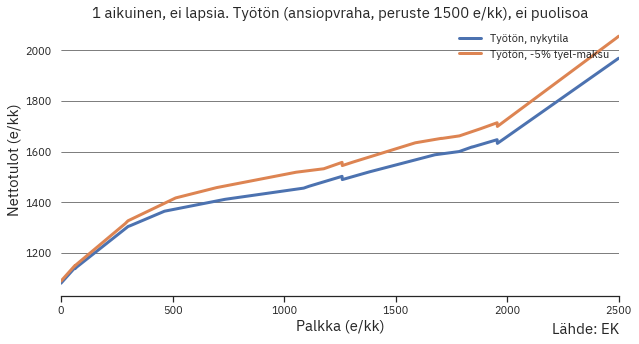

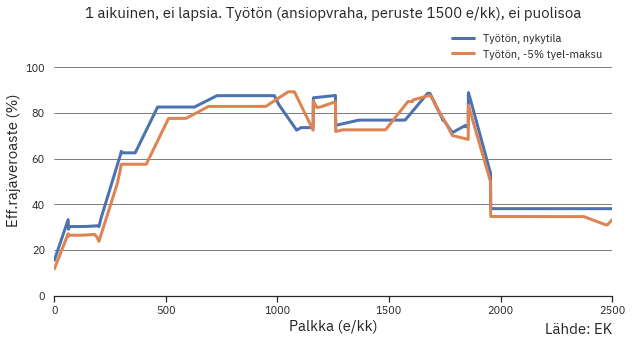

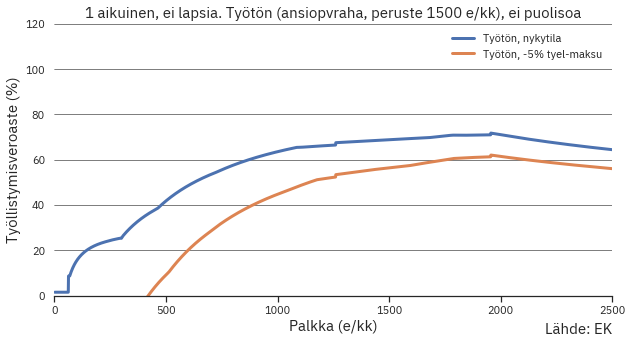

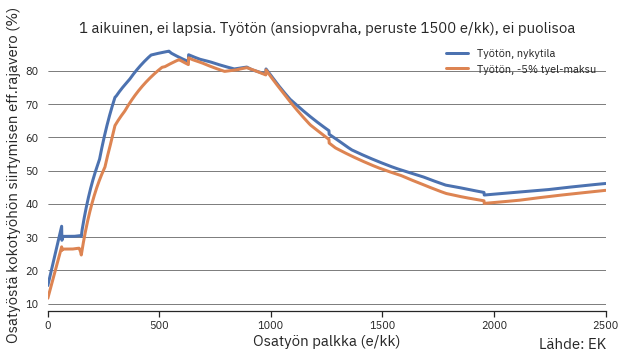

In [18]:
# Luokka Benefits() sisältää koodin
ben1=fin_benefits.Benefits()
ben2=fin_benefits.Benefits(additional_tyel_premium=0.05)
ben3=fin_benefits.Benefits(additional_tyel_premium=-0.05)

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg1=fin_benefits.Marginals(ben1,year=year)
marg2=fin_benefits.Marginals(ben2,year=year)
marg3=fin_benefits.Marginals(ben3,year=year)

# Määritellään perhetyypit
p1,selite=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)
p1['vakiintunutpalkka']=1500

incl_alv=False

# ja lasketaan & plotataan tulokset
basenetto1,baseeff1,basetva1,baseosatva1=marg1.laske_ja_plottaa_marginaalit(p1,ret=True,plottaa=False,max_salary=2500,incl_alv=incl_alv)

# ja lasketaan & plotataan tulokset
_,_,_,_=marg2.laske_ja_plottaa(p1,basenetto=basenetto1,baseeff=baseeff1,basetva=basetva1,baseosatva=baseosatva1,
                              otsikko='Työssä, +5% tyel-maksu',otsikkobase='Työssä, nykytila',
                              max_salary=2500,figname='kannusteet_työssä1',incl_alv=incl_alv)

# ja lasketaan & plotataan tulokset
p2,selite=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)
p2['vakiintunutpalkka']=1500
basenetto2,baseeff2,basetva2,baseosatva2=marg1.laske_ja_plottaa_marginaalit(p2,ret=True,plottaa=False,max_salary=2500,incl_alv=incl_alv)
bn3,be3,bt3,bo3=marg3.laske_ja_plottaa(p2,basenetto=basenetto2,baseeff=baseeff2,basetva=basetva2,baseosatva=baseosatva2,
                              otsikko='Työtön, -5% tyel-maksu',otsikkobase='Työtön, nykytila',
                              max_salary=2500,figname='kannusteet_työtön2',incl_alv=incl_alv)
bn4,be4,bt4,bo4=marg3.laske_ja_plottaa_marginaalit(p2,ret=True,plottaa=False,max_salary=2500,incl_alv=incl_alv)






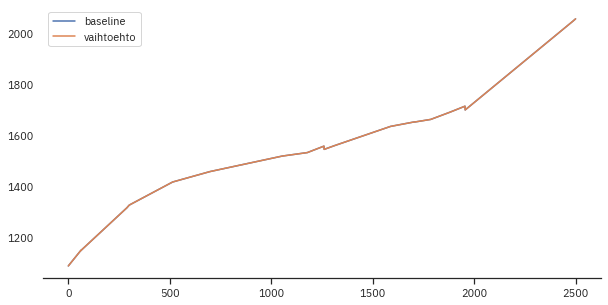

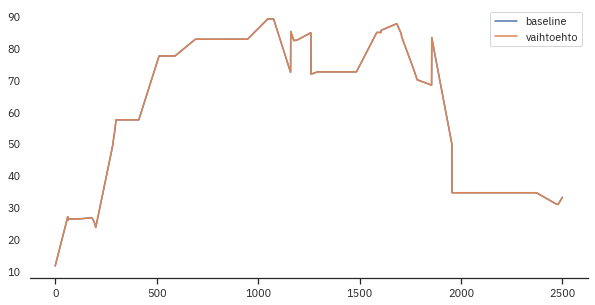

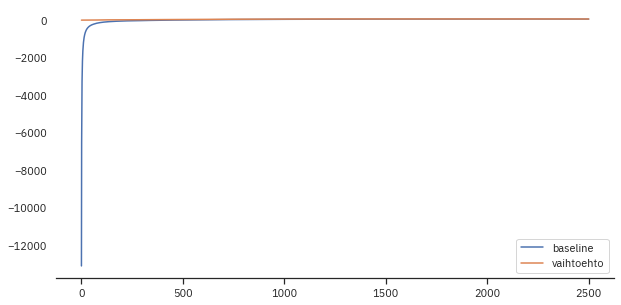

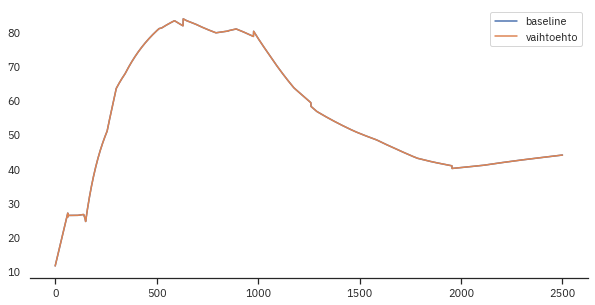

In [19]:
plt.plot(np.arange(0,2501),bn3,label='baseline')
plt.plot(np.arange(0,2501),bn4,label='vaihtoehto')
plt.legend()
plt.show()
plt.plot(np.arange(0,2501),be3,label='baseline')
plt.plot(np.arange(0,2501),be4,label='vaihtoehto')
plt.legend()
plt.show()
plt.plot(np.arange(0,2501),bt3,label='baseline')
plt.plot(np.arange(0,2501),bt4,label='vaihtoehto')
plt.legend()
plt.show()
plt.plot(np.arange(0,2501),bo3,label='baseline')
plt.plot(np.arange(0,2501),bo4,label='vaihtoehto')
plt.legend()
plt.show()

# Kokoelma esimerkkitapauksia

KeyboardInterrupt: 

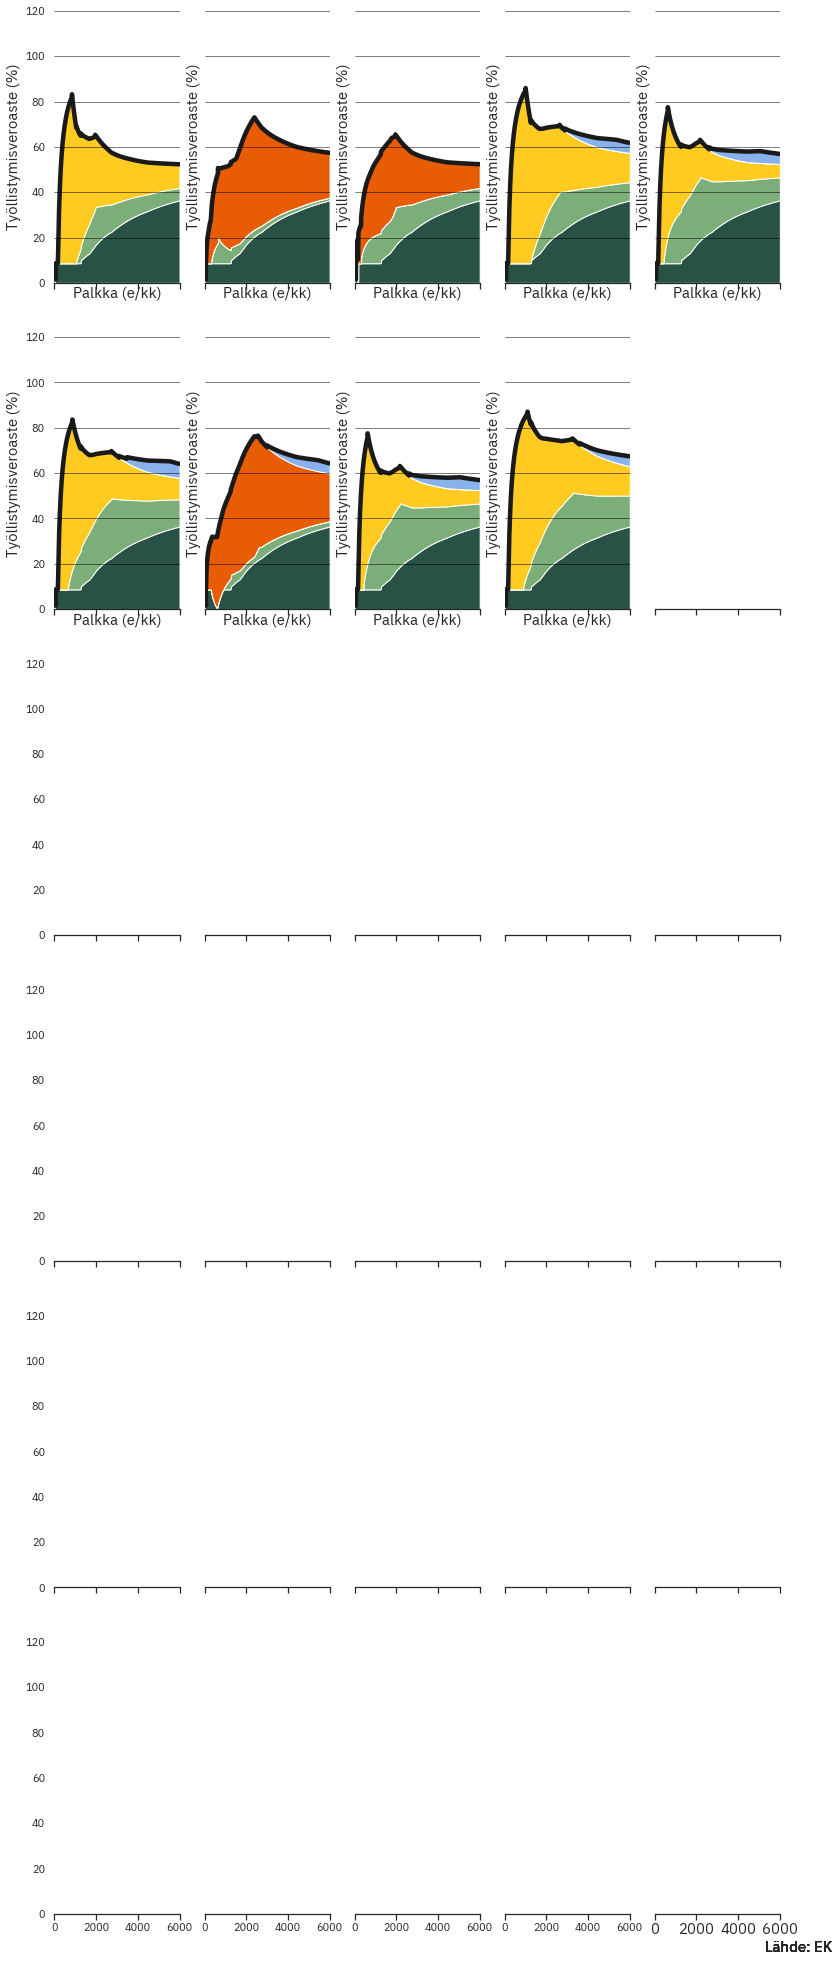

In [20]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [13, 35]
marg.laske_ja_plottaa_hila(type='tva',maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [13, 35]
marg.laske_ja_plottaa_hila(type='eff',maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [13, 35]
marg.laske_ja_plottaa_hila(type='tulot',max_salary=6000,maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018